# **Introduction**
My Dataset contains incidence and mortality historical data (cases per 100,000) of six different cancer types in ten different states of Germany over almost two decades. It is also categorized based on gender and age groups including 0-29, 30-59, 60+. <br> 
I am **Farinaz** and presenting my work on this dataset as a final project of my data analytics course at ReDI school. I am gonna use the libraries that I worked with during the course and also explore new libraries to analyse and visualize the data. <br> 
I' ve got my data from European cancer information system [European cancer information system](https://ecis.jrc.ec.europa.eu/explorer.php?$0-1$1-IT$2-127$4-1,2$3-0$6-0,85$5-2004,2010$7-2$CAgeSpecificRates$X0_14-$X0_12-$X0_13-Y$X0_16-N$CTrendsByAge$X1_14-$X1_12-$X1_18-6$X1_16-N$CTrendsByPeriod$X2_14-$X2_12-$X2_10-ASR_EU_NEW$X2_16-N$CTrendsByCohort$X3_17-ByPeriod$X3_16-N/)

# **Importing different libraries**

In [214]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
#libraries for fitting the data:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
#library for plotting the map:
import geopandas as gpd
%matplotlib inline

# **Reading my data from CSV file**

In [215]:
#reading the datasets
df=(
    pd.read_csv("/Users/farinaz/Desktop/Python/project/Germany.csv",skiprows=2,skipfooter=3)  #reading the data
    .astype({"Indicator":str, "Registry":str,"Sex":str,"Cancer":str,"Age group":str})#defining the columns data type
    .drop("Unnamed: 26",axis=1)          #removing the extra useless column
    .rename(columns={"Age group":"Age"})  #renaming a column
)
df.head()     #showing just the first five rows

<ipython-input-215-f0dd3c8212ca>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  pd.read_csv("/Users/farinaz/Desktop/Python/project/Germany.csv",skiprows=2,skipfooter=3)  #reading the data


,Indicator,Registry,Sex,Cancer,Age,1993,1994,1995,1996,1997,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Incidence,DE Bavaria,Male,Leukaemia,60+,NaN,NaN,NaN,NaN,NaN,...,55.9,55.5,55.2,55.7,52.1,54.5,51.4,50.4,49.3,NaN
1,Incidence,DE Bavaria,Male,Leukaemia,30-59,NaN,NaN,NaN,NaN,NaN,...,7.0,8.7,8.0,8.2,7.5,8.2,7.9,7.2,7.8,NaN
2,Incidence,DE Bavaria,Male,Leukaemia,0-29,NaN,NaN,NaN,NaN,NaN,...,3.7,4.0,4.4,3.8,4.1,3.7,3.5,4.0,4.2,NaN
3,Incidence,DE Bavaria,Male,Thyroid gland,60+,NaN,NaN,NaN,NaN,NaN,...,9.4,8.9,9.9,11.1,11.9,12.4,10.8,9.5,9.6,NaN
4,Incidence,DE Bavaria,Male,Thyroid gland,30-59,NaN,NaN,NaN,NaN,NaN,...,6.2,4.9,6.3,8.0,8.2,8.6,7.2,7.3,7.2,NaN


# **Rearranging and cleaning my data**

In [216]:
#rearranging dataset
df=(df.melt(id_vars=["Indicator","Registry","Sex","Cancer","Age"]
         ,var_name="Year",value_name="Cases") #reshaping the table to get a column for years and a column for cases
    .astype({'Year': int})
)
df.head()

,Indicator,Registry,Sex,Cancer,Age,Year,Cases
0,Incidence,DE Bavaria,Male,Leukaemia,60+,1993,NaN
1,Incidence,DE Bavaria,Male,Leukaemia,30-59,1993,NaN
2,Incidence,DE Bavaria,Male,Leukaemia,0-29,1993,NaN
3,Incidence,DE Bavaria,Male,Thyroid gland,60+,1993,NaN
4,Incidence,DE Bavaria,Male,Thyroid gland,30-59,1993,NaN


In [217]:
#getting to know the shape of my dataset (how many rows,how many columns):
df.shape

(14364, 7)

In [218]:
#how many missing data points in Cases column
df[df.Cases.isna()]

,Indicator,Registry,Sex,Cancer,Age,Year,Cases
0,Incidence,DE Bavaria,Male,Leukaemia,60+,1993,NaN
1,Incidence,DE Bavaria,Male,Leukaemia,30-59,1993,NaN
2,Incidence,DE Bavaria,Male,Leukaemia,0-29,1993,NaN
3,Incidence,DE Bavaria,Male,Thyroid gland,60+,1993,NaN
4,Incidence,DE Bavaria,Male,Thyroid gland,30-59,1993,NaN
...,...,...,...,...,...,...,...
14323,Mortality,DE Schleswig-Holstein,Female,Pancreas,30-59,2013,NaN
14324,Mortality,DE Schleswig-Holstein,Female,Pancreas,0-29,2013,NaN
14325,Mortality,DE Schleswig-Holstein,Female,Stomach,60+,2013,NaN
14326,Mortality,DE Schleswig-Holstein,Female,Stomach,30-59,2013,NaN


In [219]:
#removing all NaN:
df=df.dropna()
df

,Indicator,Registry,Sex,Cancer,Age,Year,Cases
216,Incidence,DE Saarland,Male,Leukaemia,60+,1993,40.0
217,Incidence,DE Saarland,Male,Leukaemia,30-59,1993,5.5
218,Incidence,DE Saarland,Male,Leukaemia,0-29,1993,2.6
219,Incidence,DE Saarland,Male,Thyroid gland,60+,1993,7.6
220,Incidence,DE Saarland,Male,Thyroid gland,30-59,1993,5.5
...,...,...,...,...,...,...,...
14359,Mortality,DE Hessen,Female,Pancreas,30-59,2013,3.8
14360,Mortality,DE Hessen,Female,Pancreas,0-29,2013,0.0
14361,Mortality,DE Hessen,Female,Stomach,60+,2013,26.2
14362,Mortality,DE Hessen,Female,Stomach,30-59,2013,2.5


# **General information about my dataset**

In [220]:
#new shape of my dataset including how many rows and columns:
df.shape

(9684, 7)

In [221]:
#getting general info including the name of columns and their datatype:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9684 entries, 216 to 14363
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Indicator  9684 non-null   object 
 1   Registry   9684 non-null   object 
 2   Sex        9684 non-null   object 
 3   Cancer     9684 non-null   object 
 4   Age        9684 non-null   object 
 5   Year       9684 non-null   int64  
 6   Cases      9684 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 605.2+ KB


In [222]:
#general info about object variables including how many categories in each categorical data:
df[["Indicator","Registry","Sex","Cancer"]].describe()

,Indicator,Registry,Sex,Cancer
count,9684,9684,9684,9684
unique,2,10,2,6
top,Incidence,DE Saarland,Male,Stomach
freq,5148,1440,4842,1614


In [223]:
#getting to know my variables better meaning the name of categories for each column/Variable:
df.Indicator.unique(),df.Registry.unique(),df.Sex.unique(),df.Cancer.unique()

(array(['Incidence', 'Mortality'], dtype=object),
 array(['DE Saarland', 'DE Hamburg', 'DE North Rhine-Westphalia',
        'DE Berlin et al', 'DE Rhineland-Palatinate',
        'DE Schleswig-Holstein', 'DE Hessen', 'DE Bremen', 'DE Bavaria',
        'DE Lower Saxony'], dtype=object),
 array(['Male', 'Female'], dtype=object),
 array(['Leukaemia', 'Thyroid gland', 'Melanoma of the skin', 'Lung',
        'Pancreas', 'Stomach'], dtype=object))

# **I wanna figure out the trend of incidence cases and mortality cases happened over two decades in different states of Germany.**
I am gonna look at: <br>
1)  the number of incidence cases over the years in different statse:
    Which states have the biggest and smallest number of incidence cases in different years <br>
2)  the number of incidence cases over the years for different cancers:
    which cancer was the most common one among the others in different years <br>
3)  the percentage of incidence cases of each cancer over the years:
    the percentage of each cancer over 1993-2013 <br>
4)  the number of mortality cases over the years in different states:
    Which states have the biggest and smallest number of mortality cases in different years <br>
5)  the number of mortality cases over the years for different cancers:
    which cancer was the most fatal one among the others in different years <br>
6)  the mortality cases percentage of each cancer over the years:
    the percentage of fatality of each cancer over 1993-2013


# Incidence Cases over the years

***1) For different states in Germany***

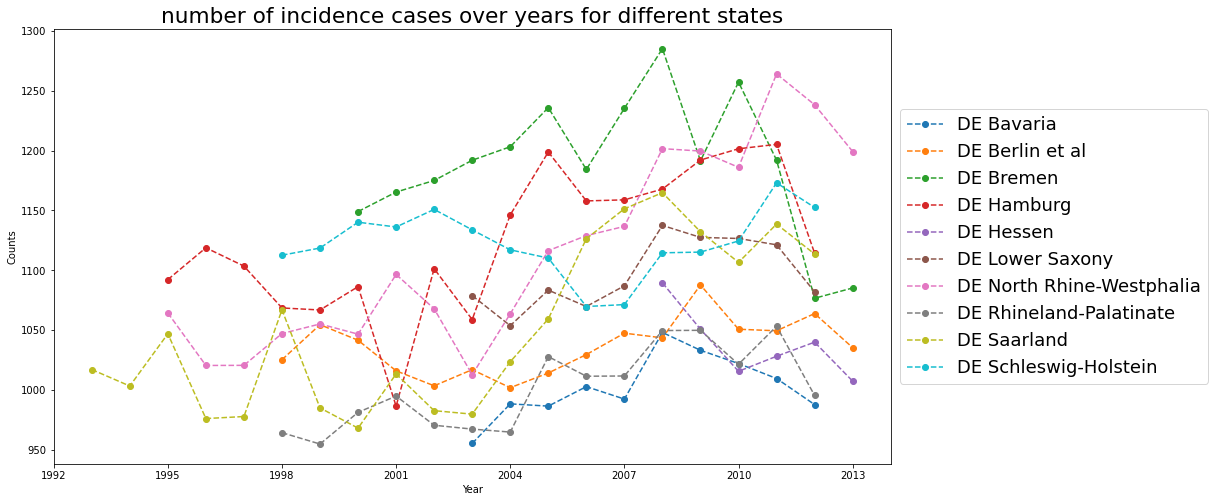

In [224]:
#comparing incidence cases over 2 decades for different states
#selecting incidence cases and grouping them based on states and years
x1=df[df["Indicator"]=="Incidence"]\
.groupby(["Registry","Year"]).Cases.sum().unstack()
#defining the size of the figure,setting the x axis to the integer values:
plt.figure(figsize=(15,8)).gca().xaxis.set_major_locator(MaxNLocator(integer=True));
#defining a for loop for plotting 
def plotting(x):
  #creating the plot and get its axes, the plot can be returned 
  ax=plt.gca();
  for i in range(x.shape[0]):                               
   x.iloc[i].plot(linestyle='--', marker='o');                      #setting the style of my plots       
  plt.legend(loc="center left", bbox_to_anchor=(1, 0, 0.5, 1));     #set the legend position
  return(ax)
#labeling the y-axis:
plt.ylabel("Counts");                                              
#defining the font size:
plt.rcParams.update({'font.size': 18})
#use the function for plotting:
plotting(x1);
plt.title("number of incidence cases over years for different states");

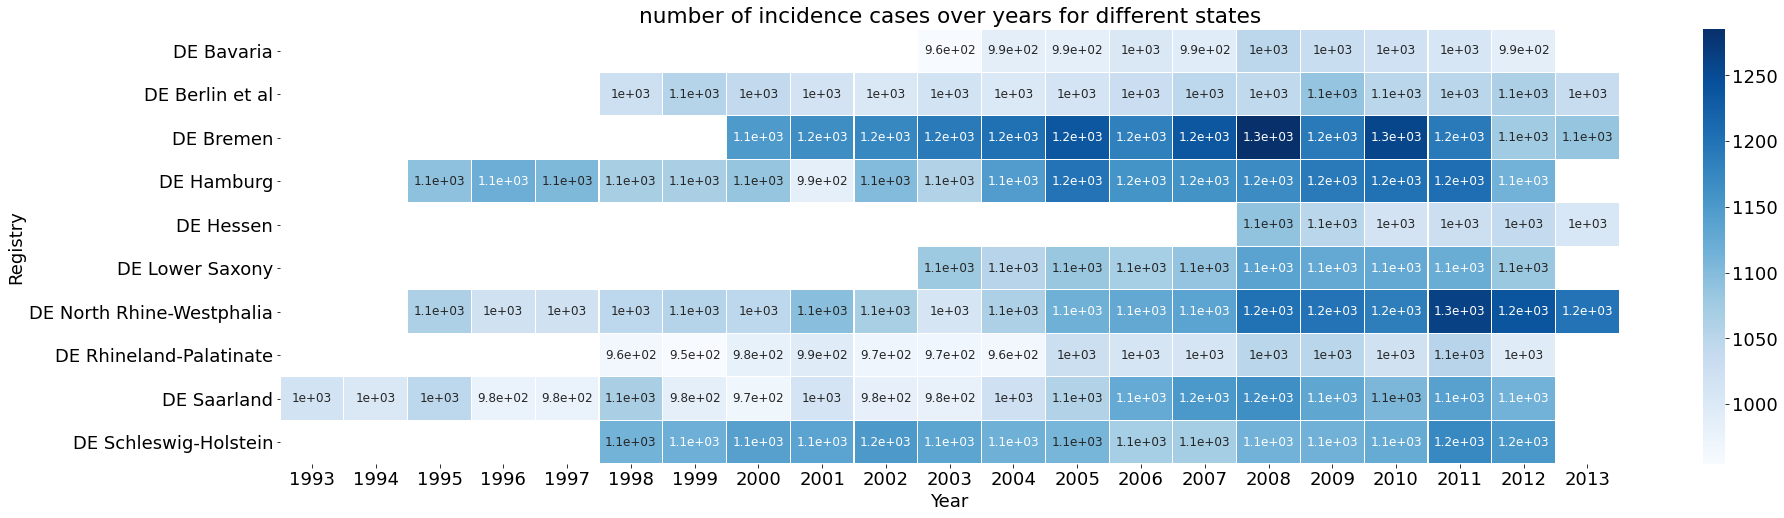

In [225]:
#defining the figure size
plt.figure(figsize=(30,8));
#plotting heatmap of data:
#parameters:data,having values in cells and thir size,the width and color of lines between cells,color of the map
sns.heatmap(x1,annot=True,annot_kws={"size":12},linewidths=0.2,linecolor="white",cmap="Blues");
#setting the title
plt.title("number of incidence cases over years for different states");
#defining the font size:
plt.rcParams.update({'font.size': 18})

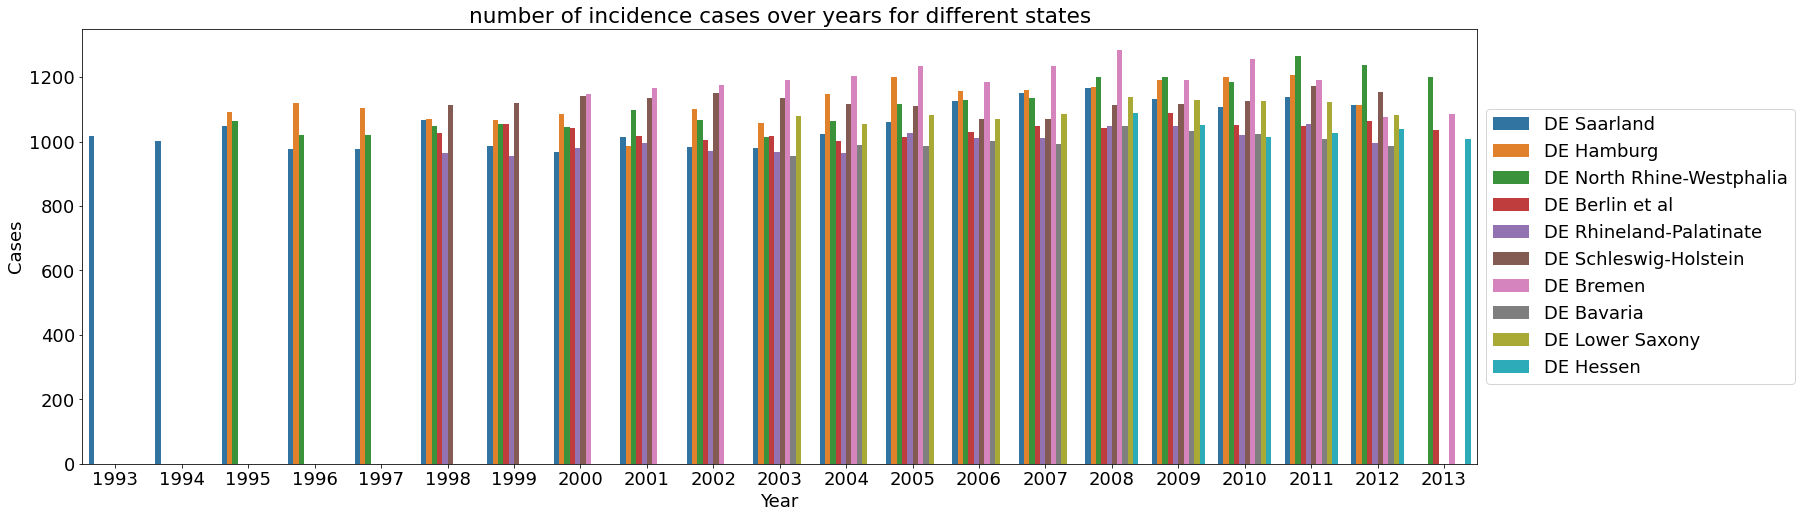

In [226]:
#rearranging the dataset to make a bar plot:
X=x1.reset_index().melt(id_vars=["Registry"],var_name="Year",value_name="Cases").dropna()
#figure size
plt.figure(figsize=(25,8));
#plotting the bars
sns.barplot(x="Year",y="Cases",hue="Registry",data=X);
#setting the legen, title and font size
plt.legend(loc="center left", bbox_to_anchor=(1, 0, 0.5, 1));
plt.title("number of incidence cases over years for different states");
plt.rcParams.update({'font.size': 18});

***2) For different cancer types***

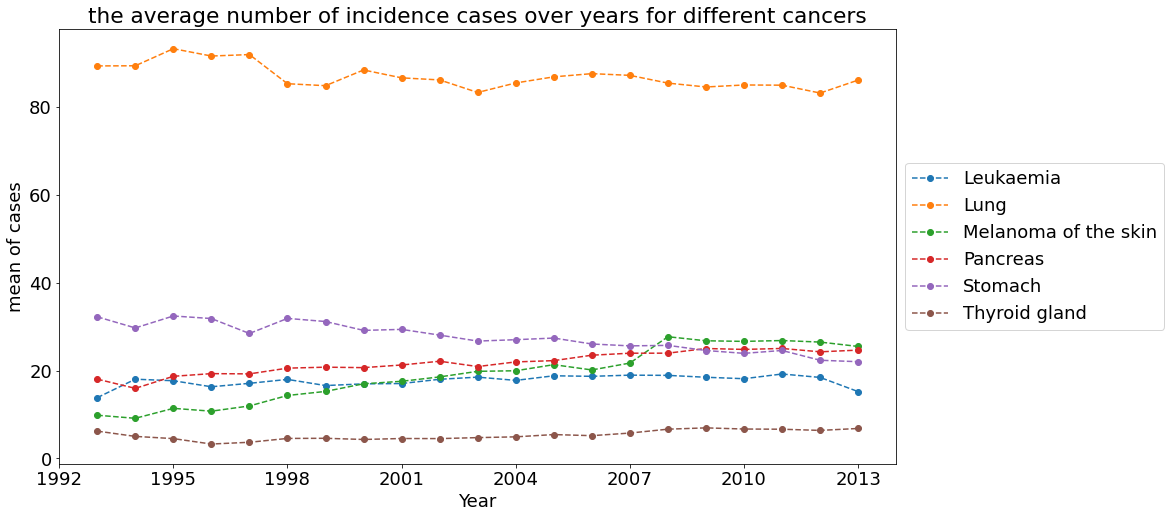

In [227]:
#comparing incidence cases over 2 decades for different type of cancers:
#selecting incidence cases and grouping them based on cancers and years
x2=df[df["Indicator"]=="Incidence"]\
.groupby(["Cancer","Year"]).Cases.mean().unstack()  
#defining the size of the figure, making the xticks into integer:
plt.figure(figsize=(15,8)).gca().xaxis.set_major_locator(MaxNLocator(integer=True));
#labeling the y-axis:
plt.ylabel("mean of cases");                            
#use the function that I defined previously to plot:
plotting(x2);
#setting the title and the font size:
plt.title("the average number of incidence cases over years for different cancers");
plt.rcParams.update({'font.size': 18});

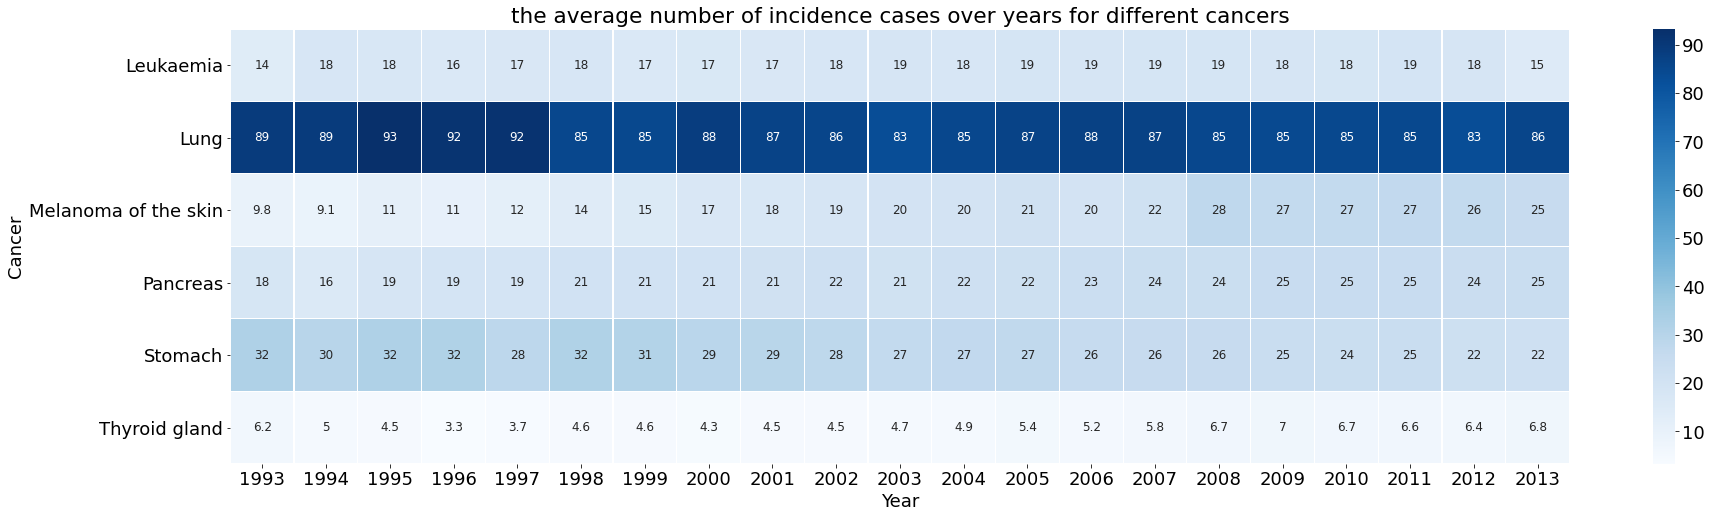

In [228]:
#making heatmap of the different cancers over the years
#figure size
plt.figure(figsize=(30,8));
#creating heatmap
#parameters:data,having values in cells and thir size,the width and color of lines between cells,color of the map
sns.heatmap(x2,annot=True,annot_kws={"size":12},linewidths=0.2,linecolor="white",cmap="Blues");
plt.title("the average number of incidence cases over years for different cancers");
#defining the font size:
plt.rcParams.update({'font.size': 18})

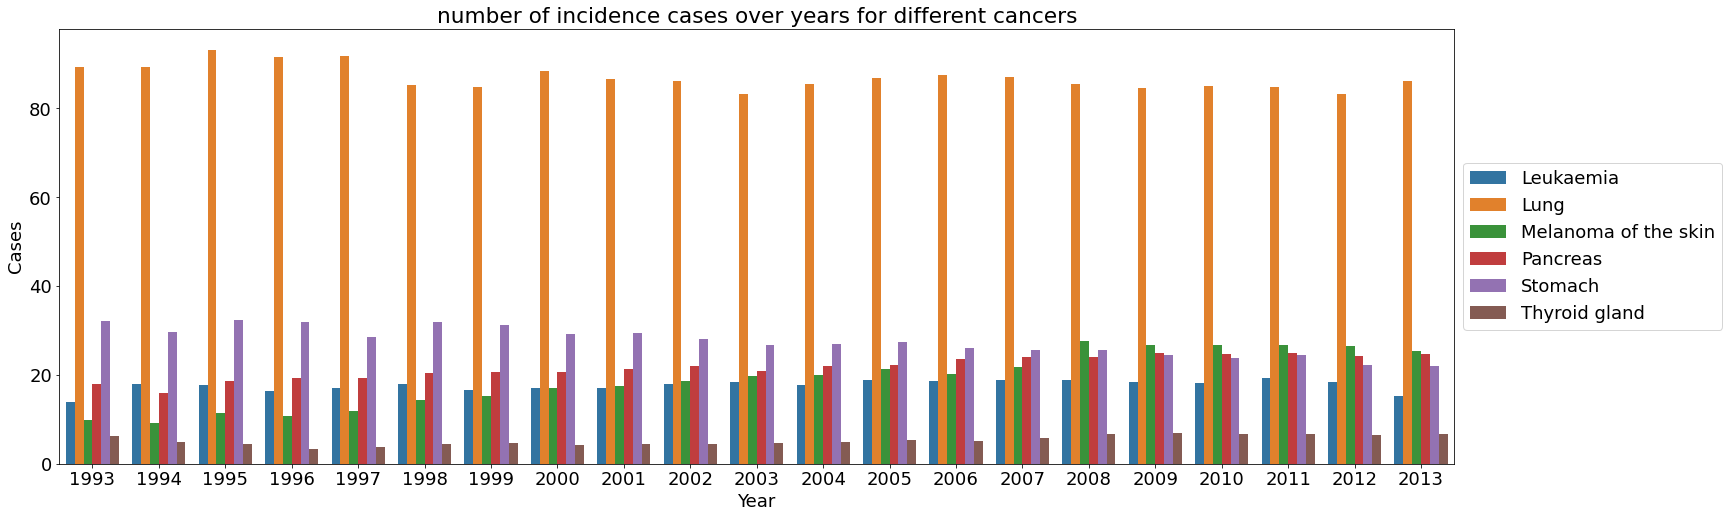

In [229]:
#rearranging the dataset to make a bar plot:
X=x2.reset_index().melt(id_vars=["Cancer"],var_name="Year",value_name="Cases").dropna()
plt.figure(figsize=(25,8));
sns.barplot(x="Year",y="Cases",hue="Cancer",data=X);
plt.legend(loc="center left", bbox_to_anchor=(1, 0, 0.5, 1));
plt.title("number of incidence cases over years for different cancers");
plt.rcParams.update({'font.size': 18})

***3) Percentage of different cancer types***

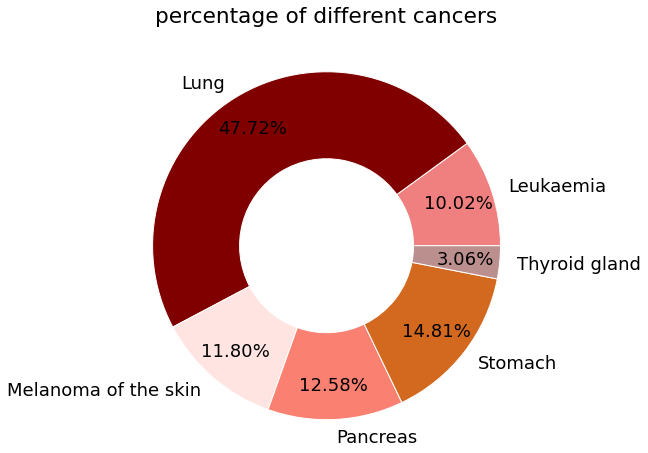

In [230]:
# a very similar comparison to the previous fig but in a pie chart whithout sorting based on years:
#defining colors to be used:
colors=["lightcoral","maroon","mistyrose","salmon","chocolate","rosybrown",
        "goldenrod","darkseagreen","teal","powderblue"]
#selecting the data I wanna show in a pie chart and plotting them
df[df["Indicator"]=="Incidence"].groupby("Cancer").Cases.mean()\
.plot.pie(radius=2,colors=colors,         #radius of pie, colors to be used (definded above)
autopct='%1.2f%%',pctdistance=0.8,labeldistance=1.1, #defining precision and position of %, posiotion of labels
          wedgeprops=dict(width=1,edgecolor="w"));   #difining the width and color of boarders between pieces
#setting the title:
plt.title("percentage of different cancers", y=1.5);
#removing the y-axis label
plt.gca().axes.get_yaxis().set_visible(False);
#defining the font size:
plt.rcParams.update({'font.size': 18})

# **Mortality cases over years**


***4) For different states in Germany***

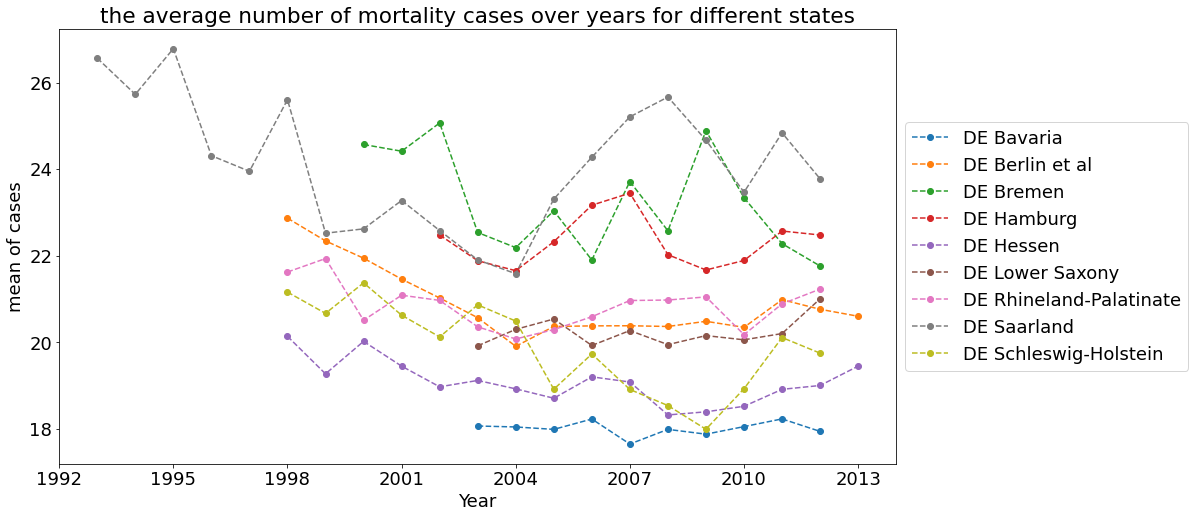

In [231]:
#comparing mortality cases over 2 decades for different states
#selecting the mortality cases and grouping them based on cancers and years
x4=df[df["Indicator"]=="Mortality"]\
.groupby(["Registry","Year"]).Cases.mean().unstack()
#defining the size of the figure, making the xticks into integer
plt.figure(figsize=(15,8)).gca().xaxis.set_major_locator(MaxNLocator(integer=True));   
#labeling the axes:
plt.ylabel("mean of cases")
#use the pre-defined function for plotting:
plotting(x4);
plt.title("the average number of mortality cases over years for different states");
#defining the font size:
plt.rcParams.update({'font.size': 18})

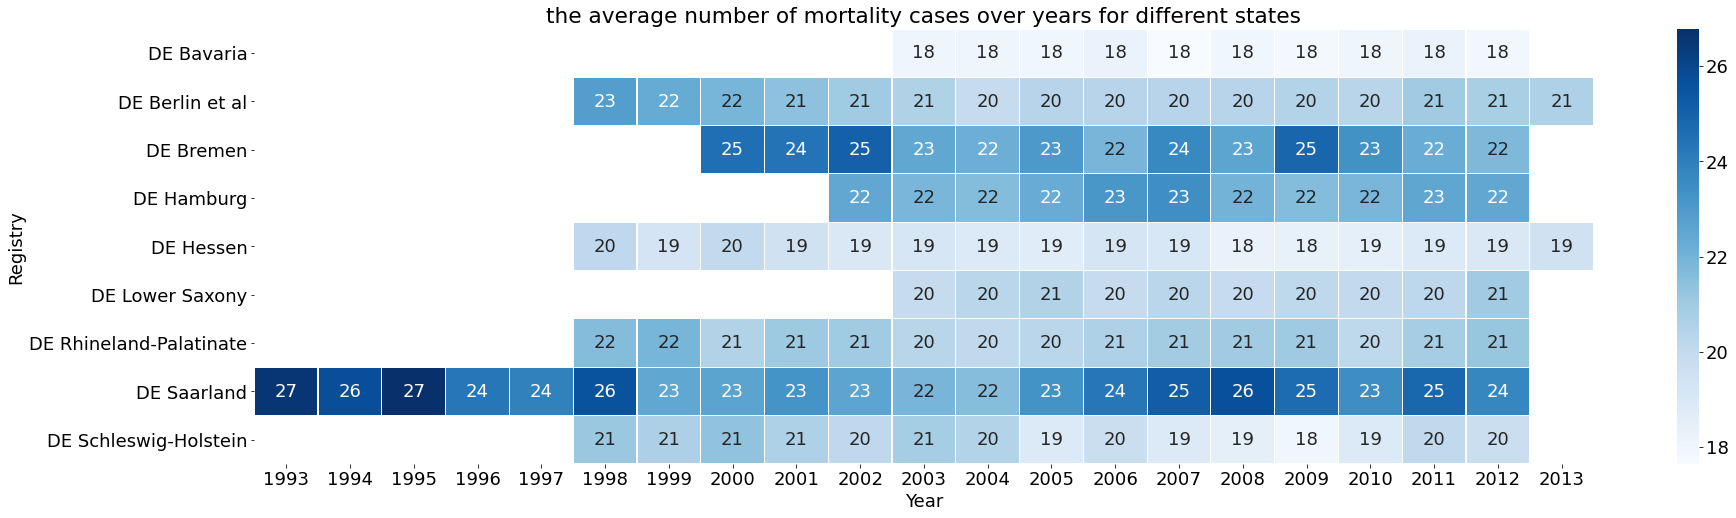

In [232]:
#setting figure size
plt.figure(figsize=(30,8));
#creating the heatmap
#parameters:data,having values in cells,the width and color of lines between cells,color of the map
sns.heatmap(x4,annot=True,linewidths=0.2,linecolor="white",cmap="Blues");
#setting the title
plt.title("the average number of mortality cases over years for different states");
#defining the font size:
plt.rcParams.update({'font.size': 18})

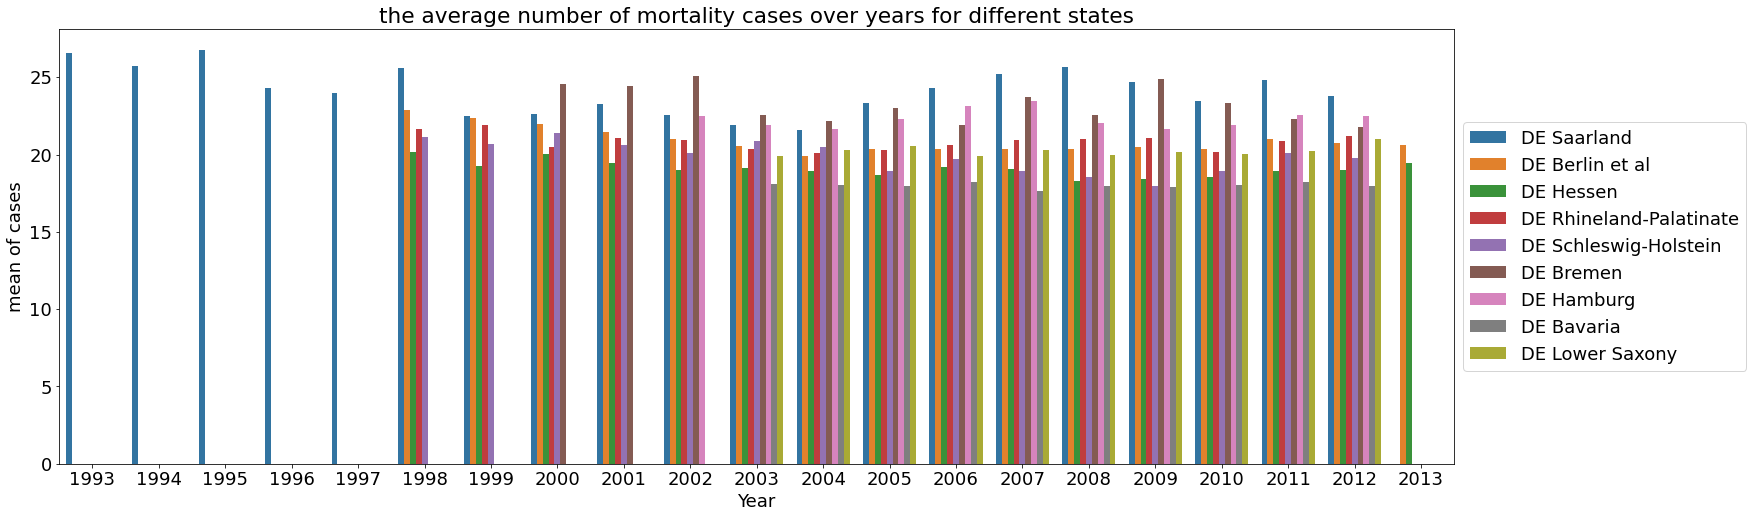

In [233]:
#rearranging the dataset to make a bar plot:
X=x4.reset_index().melt(id_vars=["Registry"],value_name="Cases").dropna()
#setting the figure size
plt.figure(figsize=(25,8));
#plotting the data
sns.barplot(x="Year",y="Cases",hue="Registry",data=X);
#setting the legend position
plt.legend(loc="center left", bbox_to_anchor=(1, 0, 0.5, 1));
#setting y-label axis
plt.ylabel("mean of cases")
#setting the title
plt.title("the average number of mortality cases over years for different states");
#defining the font size:
plt.rcParams.update({'font.size': 18})

***5) For different Cancer types***

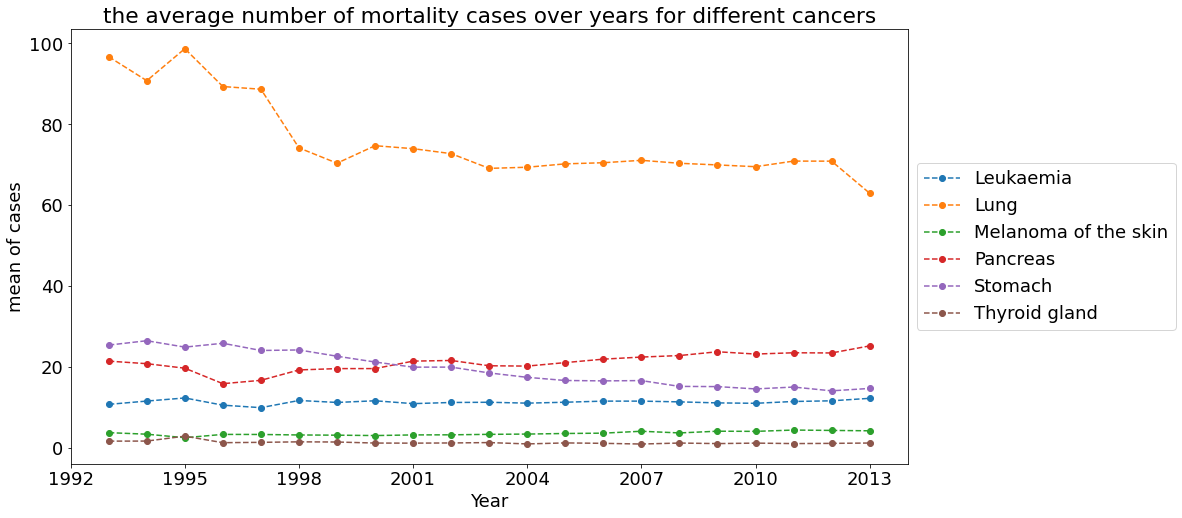

In [234]:
#comparing incidence cases over 2 decades for different type of cancers
#selecting the cases of Mortality and grouping based on cancer types and years
x5=df[df["Indicator"]=="Mortality"]\
.groupby(["Cancer","Year"]).Cases.mean().unstack()             
#defining the size of the figure, making the xticks into integer
plt.figure(figsize=(15,8)).gca().xaxis.set_major_locator(MaxNLocator(integer=True)); 
#setting the y-label axis
plt.ylabel("mean of cases")
#use the pre-defined function for plotting:
plotting(x5);
#setting the title
plt.title("the average number of mortality cases over years for different cancers");
#defining the font size:
plt.rcParams.update({'font.size': 18})

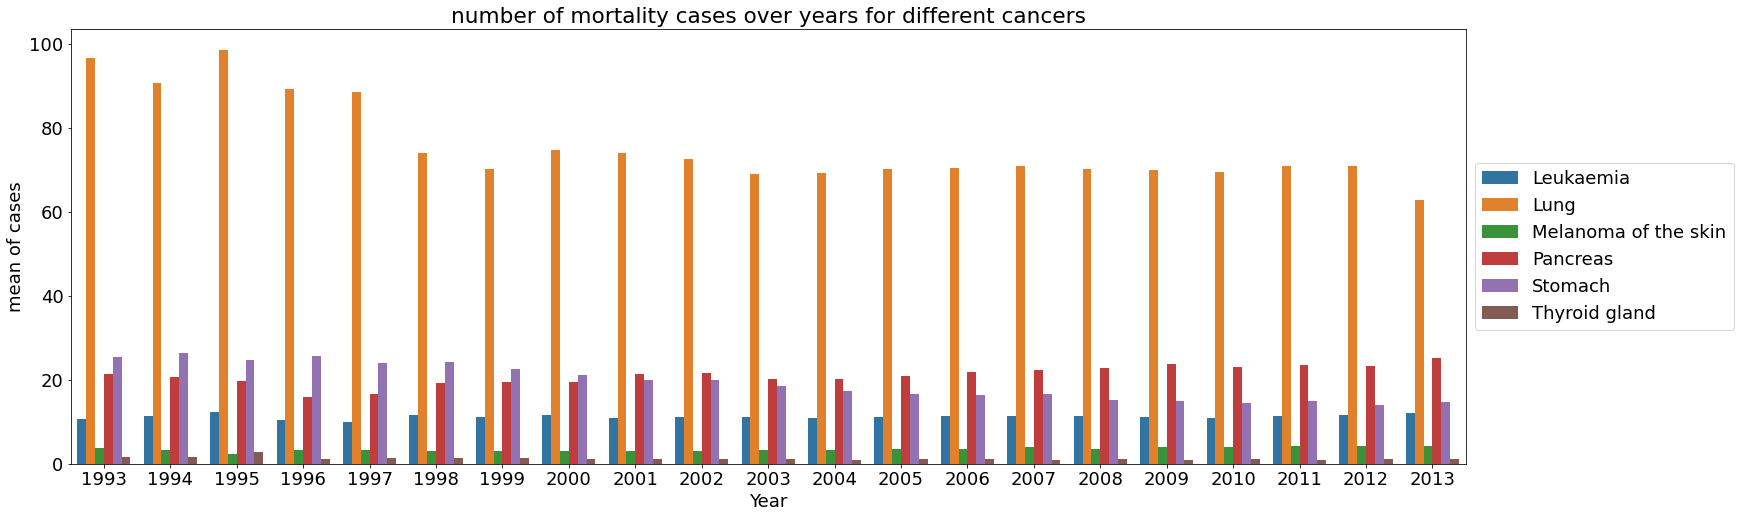

In [235]:
#rearranging the dataset to make a bar plot:
X=x5.reset_index().melt(id_vars=["Cancer"],value_name="Cases").dropna()
#setting figure size
plt.figure(figsize=(25,8));
#plotting the data
sns.barplot(x="Year",y="Cases",hue="Cancer",data=X);
#setting legend position,y-label axis, title and the font size
plt.legend(loc="center left", bbox_to_anchor=(1, 0, 0.5, 1));
plt.ylabel("mean of cases");
plt.title("number of mortality cases over years for different cancers");
plt.rcParams.update({'font.size': 18})

***6) Percentage of different cancer types***

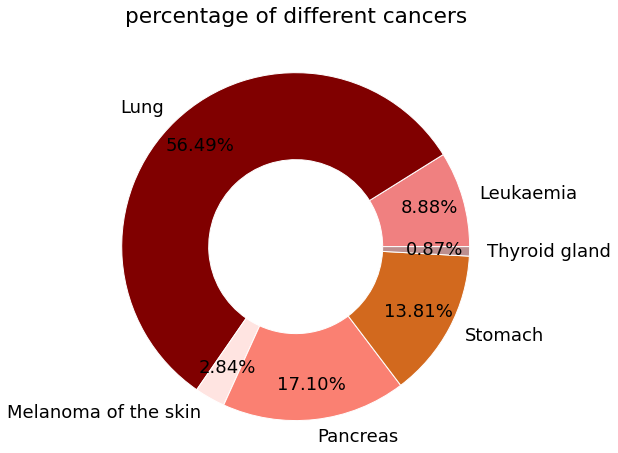

In [236]:
# a very similar comparison to the previous fig but in a pie chart whithout sorting based on years:
#selecting the data and plotting a pie chart:
df[df["Indicator"]=="Mortality"].groupby("Cancer").Cases.mean()\
.plot.pie(radius=2,colors=colors,         #radius of pie, colors to be used (definded above)
autopct='%1.2f%%',pctdistance=0.8,labeldistance=1.1, #defining precision and position of %, posiotion of labels
          wedgeprops=dict(width=1,edgecolor="w"));   #difining the width and color of boarders between pieces
#setting the title and its position
plt.title("percentage of different cancers", y=1.5);
#removing the y-axis label
plt.gca().axes.get_yaxis().set_visible(False);
#defining the font size:
plt.rcParams.update({'font.size': 18})

# **I wanna compare the number of incidence and mortality cases for each state over 2008-2012**

I am gonna look at:

*   percentage of incidence and mortality cases over 2008-2012 for each state:
    which states have the biggest number of incidence and mortality cases and which states have the smallest number




**Percentage of Incidence cases in different states**

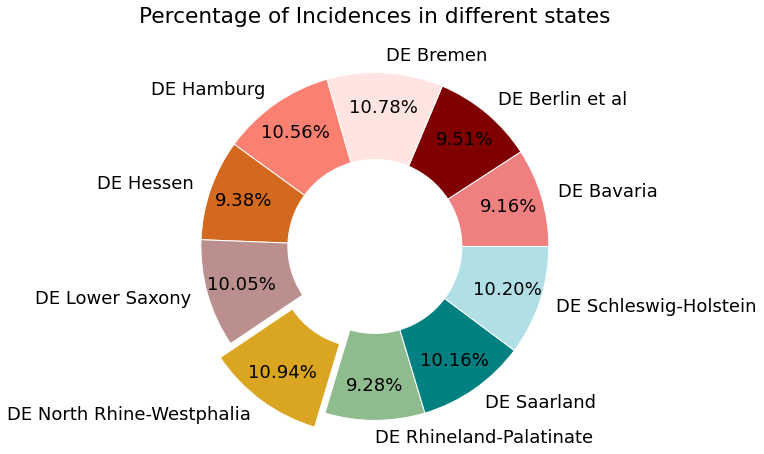

In [237]:
#comparison between different states in incidences 2008-2012
#choosing the common years for all states
selected_year=df[(df["Year"]>2007) & (df["Year"]<2013)]    
#investigating of incidence cases for different states
selected_year[selected_year["Indicator"]=="Incidence"].groupby("Registry").Cases.mean()\
.plot.pie(radius=2,colors=colors,         #radius of pie, colors to be used (definded above)
autopct='%1.2f%%',pctdistance=0.8,labeldistance=1.1, #defining precision and position of %, posiotion of labels
          wedgeprops=dict(width=1,edgecolor="w")   #difining the width and color of boarders between pieces
          ,explode=(0,0,0,0,0,0,0.2,0,0,0));      #defining the piece for exploding
#defining the title and its position
plt.title("Percentage of Incidences in different states",y=1.5);
#hiding the y-axis label
plt.gca().axes.get_yaxis().set_visible(False)
#defining the font size:
plt.rcParams.update({'font.size': 18})

**Percentage of Incidence and Mortality cases in different states.**

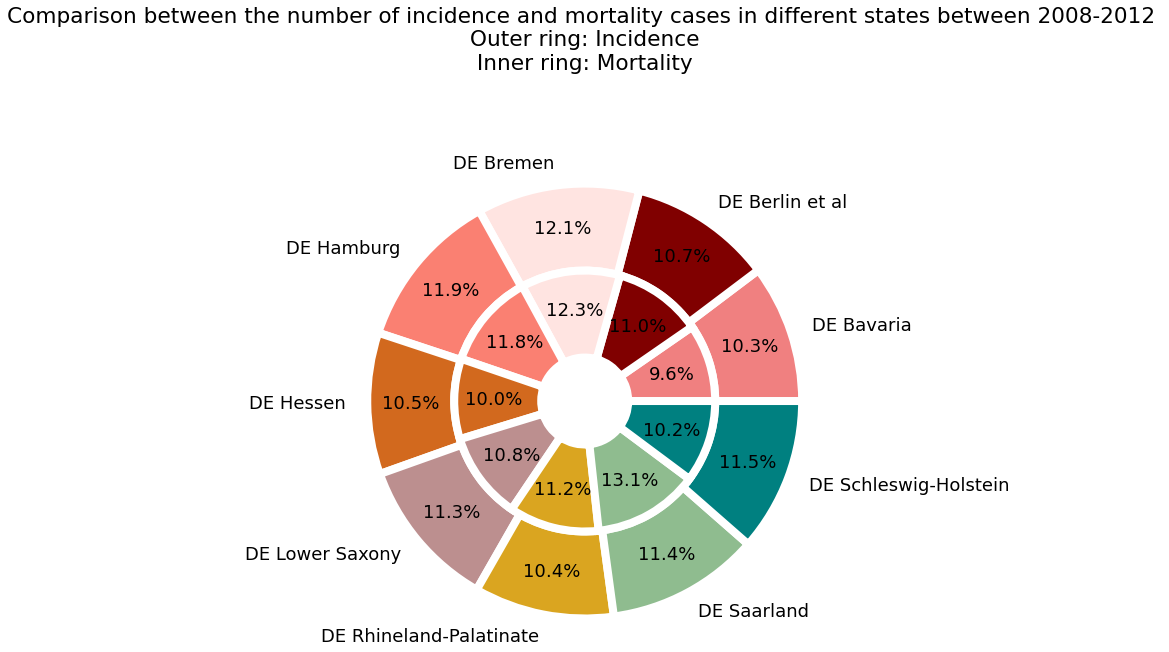

In [238]:
#comparison between mortality cases and incidences in different states 2008-2012
#taking the data of DE North Rhine-Westphali because this state has no data for mortality
North_Rhine=selected_year.groupby("Registry").get_group('DE North Rhine-Westphalia') 
#removing the data of DE North Rhine-Westphali
selected_year_2=selected_year[~selected_year.isin(North_Rhine)].dropna()          

#selecting incidence cases for different states and making the pie chart(outer ring)
selected_year_2[selected_year_2["Indicator"]=="Incidence"].groupby("Registry").Cases.mean()\
.plot.pie(radius=2.5,colors=colors,  #radius of pie, colors to be used (definded above)
autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1, #defining precision and position of %, posiotion of labels
wedgeprops=dict(width=1, edgecolor='w',linewidth=8));  #difining the width and color of boarders between pieces

#selecting mortality cases for different states and making the pie chart (inner ring)
selected_year_2[selected_year_2["Indicator"]=="Mortality"].groupby("Registry").Cases.mean()\
.plot.pie(labels=None,radius=1.5, colors=colors,#removing the label,radius of pie, colors to be used 
autopct='%1.1f%%', pctdistance=0.7,               #defining precision and position of %
wedgeprops=dict(width=1, edgecolor='w',linewidth=8)); #difining the width and color of boarders between pieces
#setting the title and its position
plt.title("Comparison between the number of incidence and mortality cases \
in different states between 2008-2012 \n Outer ring: Incidence \n Inner ring: Mortality " ,y=2);
#hiding the y-axis label
plt.gca().axes.get_yaxis().set_visible(False)
#defining the font size:
plt.rcParams.update({'font.size': 14})

# **I wanna compare the number of incidence and mortality cases for each cancer over 2008-2012**

I am gonna look at:

*   percentage of incidence and mortality cases over 2008-2012 for each cancer:
    which cancers have the biggest number of incidence and mortality cases and which cancers have the smallest number

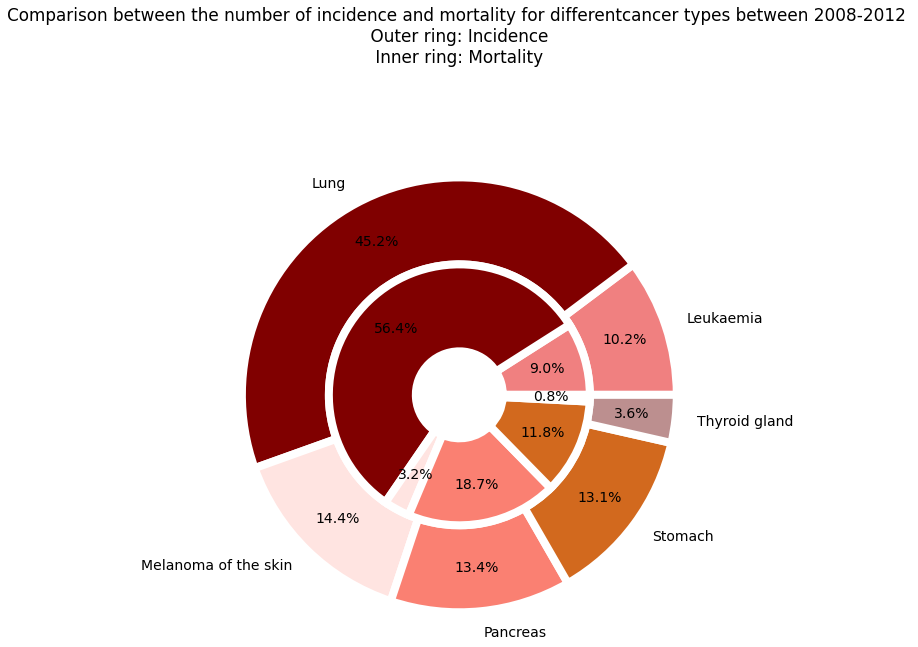

In [239]:
#comparison between mortality cases and incidences for different cancers 2008-2012
#investigating of incidence cases for different cancer types:
selected_year_2[selected_year_2["Indicator"]=="Incidence"].groupby("Cancer").Cases.mean()\
.plot.pie(radius=2.5,colors=colors,  #radius of pie, colors to be used (definded above)
autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1, #defining precision and position of %, posiotion of labels
wedgeprops=dict(width=1, edgecolor='w',linewidth=8));  #difining the width and color of boarders between pieces

#investigating of mortality cases for different cancer types:
selected_year_2[selected_year_2["Indicator"]=="Mortality"].groupby("Cancer").Cases.mean()\
.plot.pie(labels=None,radius=1.5, colors=colors,#removing the label,radius of pie, colors to be used 
autopct='%1.1f%%', pctdistance=0.7,               #defining precision and position of %
wedgeprops=dict(width=1, edgecolor='w',linewidth=8)); #difining the width and color of boarders between pieces
#setting the title and its position
plt.title("Comparison between the number of incidence and mortality for different\
cancer types between 2008-2012 \n Outer ring: Incidence \n Inner ring: Mortality " ,y=2); 
 #hiding the y-axis label
plt.gca().axes.get_yaxis().set_visible(False)
#defining the font size:
plt.rcParams.update({'font.size': 14})

# **Incidence vs Mortality**

I am looking at <br>
1) The overall incidence and mortality cases for different years in 2008-2012 and find the correlation between them.<br>
2) The overall incidence and mortality cases over 2008-2012 for different age groups and find the correlation between them.<br>
3) The overall incidence and mortality cases over 2008-2012 for male and female cases and find the correlation between them.<br>
4) The overall incidence and mortality cases over 2008-2012 for different cancer types and find the correlation between them.

**1) correlation for each year between 2008-2012**

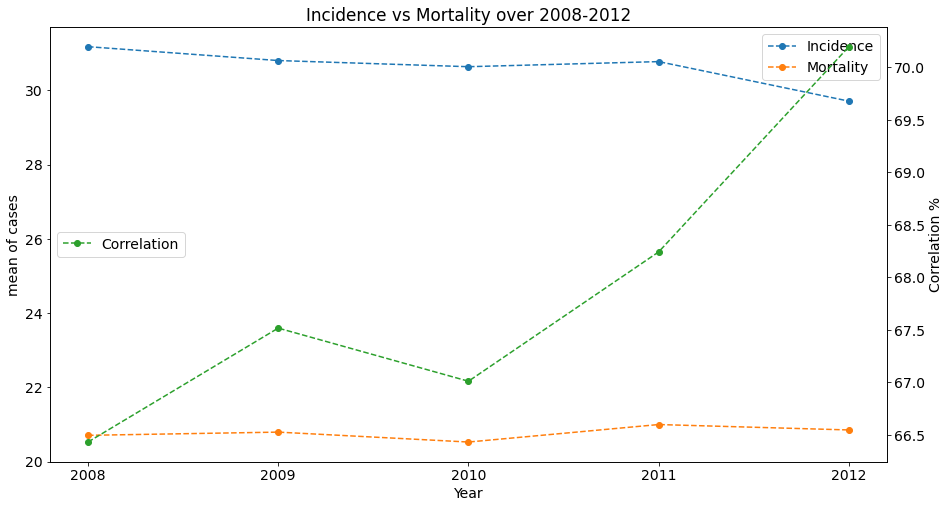

In [240]:
#comparing incidence and mortality cases:
#selecting the incidence and mortality cases for 2008-2012 and grouping based on indicator and year
data1=selected_year_2.groupby(["Indicator","Year"]).Cases.mean().unstack()
#calculation the correlation (in %) between incidence and mortality for each year:
data1.loc["Correlation"]=data1.loc["Mortality"].div(data1.loc["Incidence"])*100

#defining the size of the figure and setting the x-axis value to integers
plt.figure(figsize=(15,8)).gca().xaxis.set_major_locator(MaxNLocator(integer=True));  
#plotting the data through a for loop:
for i in range(len(data1)):
  if i!= (len(data1)-1):
    data1.iloc[i].plot(linestyle='--', marker='o',label=data1.index.values[i]);
    plt.ylabel("mean of cases");
    plt.legend();
  else:
    #using the sexond y-axis for correlation data
    data1.iloc[i].plot(linestyle='--', marker='o',label=data1.index.values[i],secondary_y=True);   
    plt.ylabel("Correlation %");
    plt.legend(loc="center left");
#setting the title
plt.title("Incidence vs Mortality over 2008-2012");  
#making ticks parallel to the axis  
plt.xticks(rotation=0);

**2) correlation for different age groups between 2008-2012.**

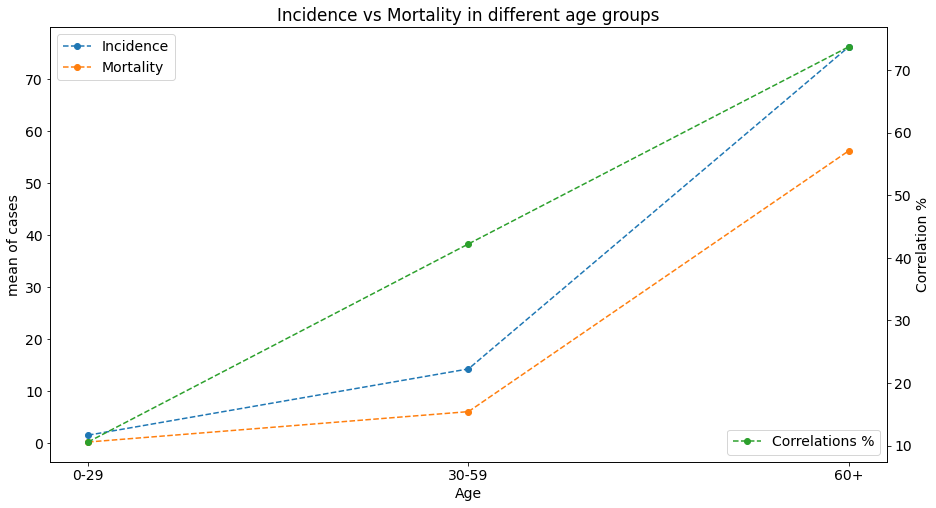

In [241]:
#comparing incidence and mortality cases for different age groups:
#selecting incidence and mortality casesand grouping based on indicator and age:
data2=selected_year_2.groupby(["Indicator","Age"]).Cases.mean().unstack()
#calculation the correlation (in %) between incidence and mortality for each year:
data2.loc["Correlation"]=data2.loc["Mortality"].div(data2.loc["Incidence"])*100
#plotting the data:
#defining the size of the figure and setting the x-axis value to integers
plt.figure(figsize=(15,8)).gca().xaxis.set_major_locator(MaxNLocator(integer=True));  
#plotting the data through a for loop:
for i in range(len(data2)):
  if i!= len(data2)-1:
   data2.iloc[i].plot(linestyle='--', marker='o')
   plt.ylabel("mean of cases");
   plt.legend(loc="upper left");
  else:
   #using the sexond y-axis for correlation data
   data2.iloc[i].plot(linestyle='--', marker='o',secondary_y=True,label="Correlations %");
   plt.ylabel("Correlation %");
   plt.legend(loc="lower right");
#setting the title
plt.title("Incidence vs Mortality in different age groups");
#making ticks parallel to the axis  
plt.xticks(rotation=0);

**3) correlation for male and female cases between 2008-2012.**

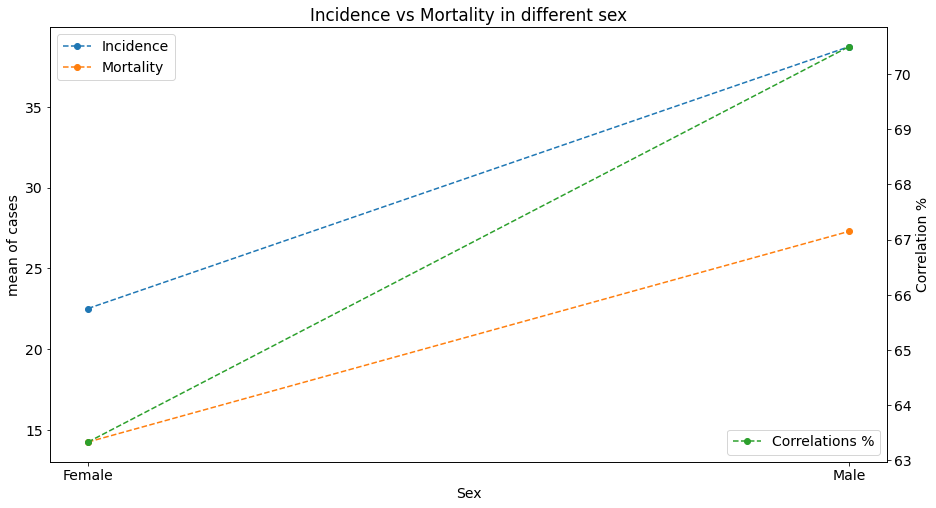

In [242]:
#comparing incidence and mortality cases for different sex:
#selecting the incidence and mortality cases and grouping based on indicator and sex:
data3=selected_year_2.groupby(["Indicator","Sex"]).Cases.mean().unstack()
#calculation the correlation (in %) between incidence and mortality for each year:
data3.loc["Correlation"]=data3.loc["Mortality"].div(data3.loc["Incidence"])*100
#plotting the data:
#defining the size of the figure and setting the x-axis value to integers
plt.figure(figsize=(15,8)).gca().xaxis.set_major_locator(MaxNLocator(integer=True));
#plotting the data through a for loop:
for i in range(len(data3)):
  if i!= len(data3)-1:
   data3.iloc[i].plot(linestyle='--', marker='o')
   plt.ylabel("mean of cases");
   plt.legend(loc="upper left");
  else:
   #using the sexond y-axis for correlation data
   data3.iloc[i].plot(linestyle='--', marker='o',secondary_y=True,label="Correlations %");
   plt.ylabel("Correlation %");
   plt.legend(loc="lower right");
#setting the title
plt.title("Incidence vs Mortality in different sex");
#making ticks parallel to the axis  
plt.xticks(rotation=0);

**4) correlation for different cancer types between 2008-2012.**

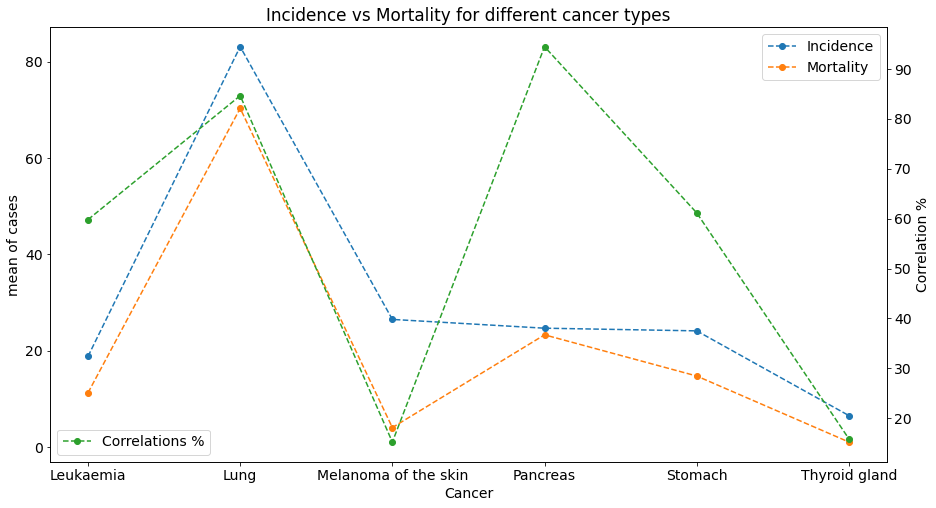

In [243]:
#comparing incidence and mortality cases for different cancers:
#selecting the incidence and mortality cases and grouping based on indicator and cancer:
data4=selected_year_2.groupby(["Indicator","Cancer"]).Cases.mean().unstack()
#calculation the correlation (in %) between incidence and mortality for each year:
data4.loc["Correlation"]=data4.loc["Mortality"].div(data4.loc["Incidence"])*100
#defining the size of the figure and setting the x-axis value to integers
plt.figure(figsize=(15,8)).gca().xaxis.set_major_locator(MaxNLocator(integer=True));
#plotting the data through a for loop:
for i in range(len(data4)):
  if i!= len(data4)-1:
   data4.iloc[i].plot(linestyle='--', marker='o')
   plt.ylabel("mean of cases");
   plt.legend();
  else:
    #using the sexond y-axis for correlation data
   data4.iloc[i].plot(linestyle='--', marker='o',secondary_y=True,label="Correlations %");
   plt.ylabel("Correlation %");
   plt.legend(loc="lower left");
#setting the title
plt.title("Incidence vs Mortality for different cancer types");
#making ticks parallel to the axis 
plt.xticks(rotation=0);

# **I wanna find out the influence of sex and age on the incidence probabilties of different cancer types between 2008-2012**

<Figure size 432x288 with 0 Axes>

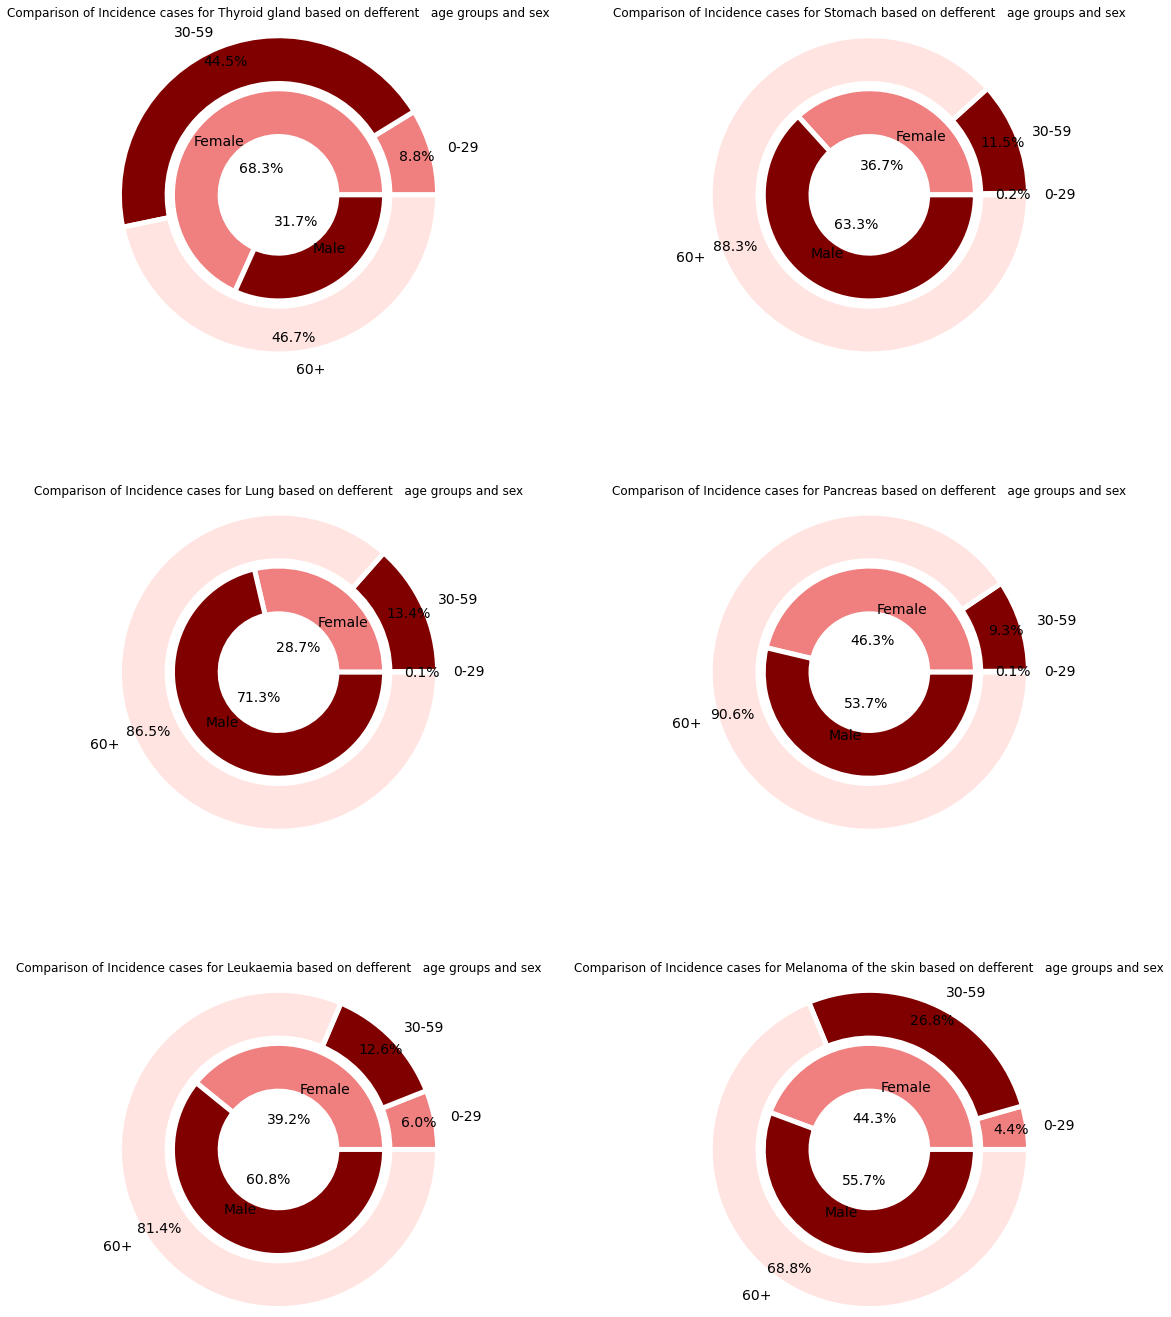

In [244]:
#selecting the incidence cases
INC=selected_year.groupby("Indicator").get_group("Incidence")
#defining the plotting function:
#taking the data and the string of cancer name:
def plotting2(x,y):
  #creating the plot and get its axes, the plot can be returned 
  ax=plt.gca();
  #select the data for the cancer and group based on the sex (outer ring)
  x[x["Cancer"]==y].groupby("Sex").Cases.mean()\
  .plot.pie(colors=colors,autopct='%1.1f%%', pctdistance=0.3, labeldistance=0.6,radius=2,
            wedgeprops=dict(width=0.9, edgecolor='w',linewidth=5),textprops={'fontsize': 14});
  #select the data for the cancer and group based on the age (inner ring)
  x[x["Cancer"]==y].groupby("Age").Cases.mean()\
  .plot.pie(colors=colors,autopct='%1.1f%%', pctdistance=0.9, labeldistance=1.1,radius=3,
            wedgeprops=dict(width=0.9, edgecolor='w',linewidth=5),textprops={'fontsize': 14});
  plt.title("Comparison of Incidence cases for {} based on defferent \
  age groups and sex".format(y),y=1.8,fontdict={"size":12});
  #hiding the y-axis label
  plt.gca().axes.get_yaxis().set_visible(False); 
  return(ax)
#defining the font size:
plt.rcParams.update({'font.size': 18});
#defining a grid with subplots and using the plotting function:
fig=plt.figure(constrained_layout=True);
#defining the number of columns and rows
a= gridspec.GridSpec(ncols=3, nrows=7, figure=fig);
plt.figure(figsize=(15,20));
#plotting for all the cancers using the pre-defined function
plt.subplot(a[0,0]);
plotting2(INC,"Thyroid gland");
plt.subplot(a[0,2]);
plotting2(INC,"Stomach");
plt.subplot(a[3,0]);
plotting2(INC,"Lung");
plt.subplot(a[3,2]);
plotting2(INC,"Pancreas");
plt.subplot(a[6,0]);
plotting2(INC,"Leukaemia");
plt.subplot(a[6,2]);
plotting2(INC,"Melanoma of the skin");

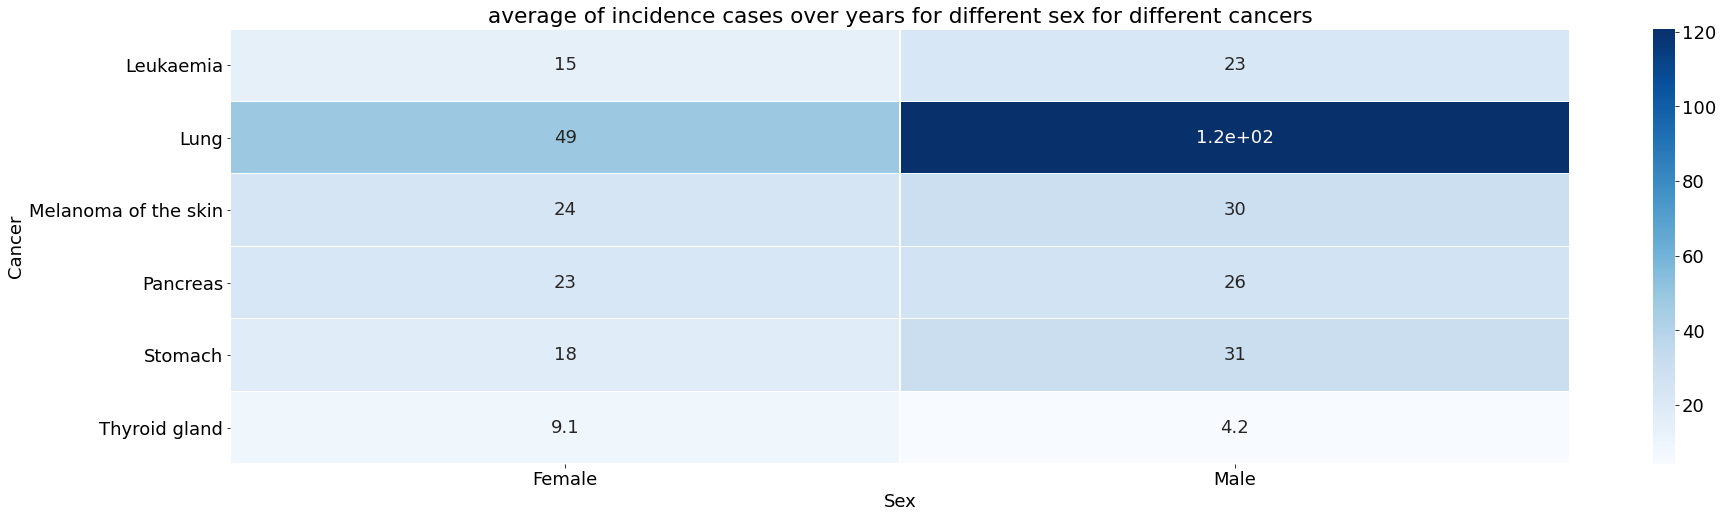

In [245]:
#a comparison illustrated in a heatmap for different cancers based on gender
SEX=INC.groupby(["Cancer","Sex"]).Cases.mean().unstack()
plt.figure(figsize=(30,8));
#creating heatmap
sns.heatmap(SEX,annot=True,linewidths=0.2,linecolor="white",cmap="Blues");
plt.title("average of incidence cases over years for different sex for different cancers");
#defining the font size:
plt.rcParams.update({'font.size': 18})

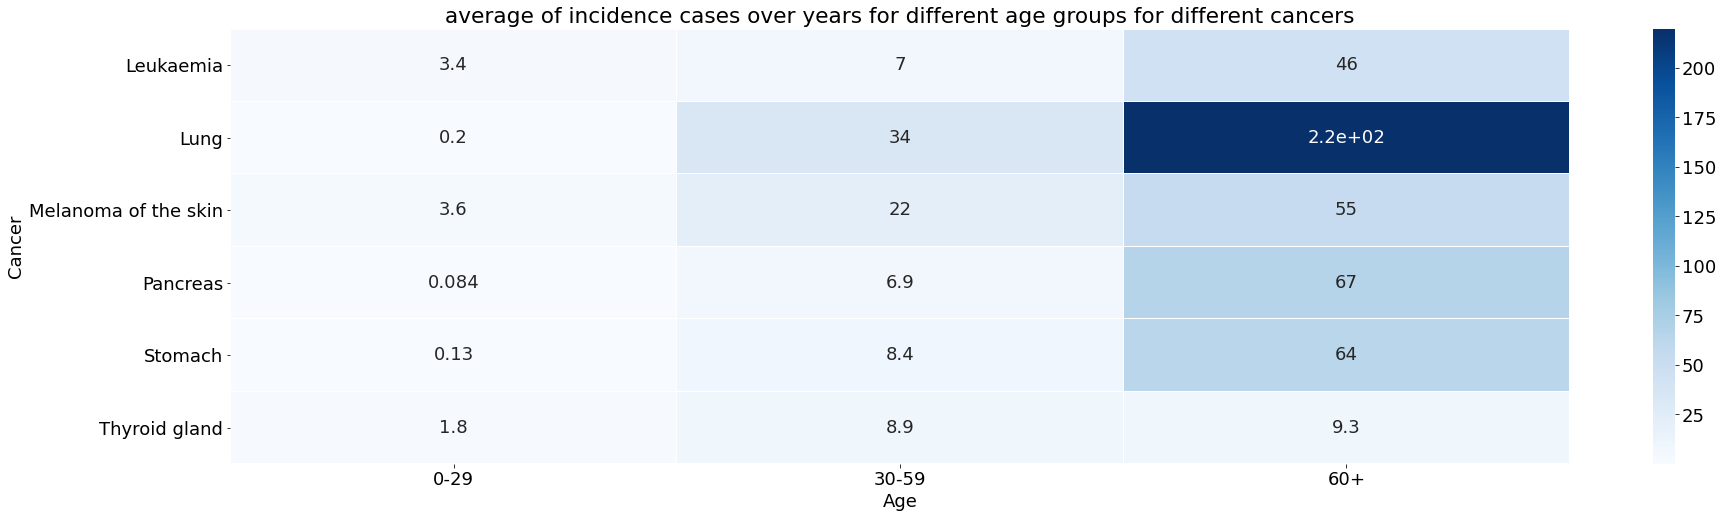

In [246]:
#a comparison illustrated in a heatmap for different cancers based on age
AGE=INC.groupby(["Cancer","Age"]).Cases.mean().unstack()
plt.figure(figsize=(30,8));
#creating the heatmap
sns.heatmap(AGE,annot=True,linewidths=0.2,linecolor="white",cmap="Blues");
plt.title("average of incidence cases over years for different age groups for different cancers");
#defining the font size:
plt.rcParams.update({'font.size': 18})

# **I wanna find out the influence of sex and age on the mortality probabilties of different cancer types between 2008-2012**

<Figure size 432x288 with 0 Axes>

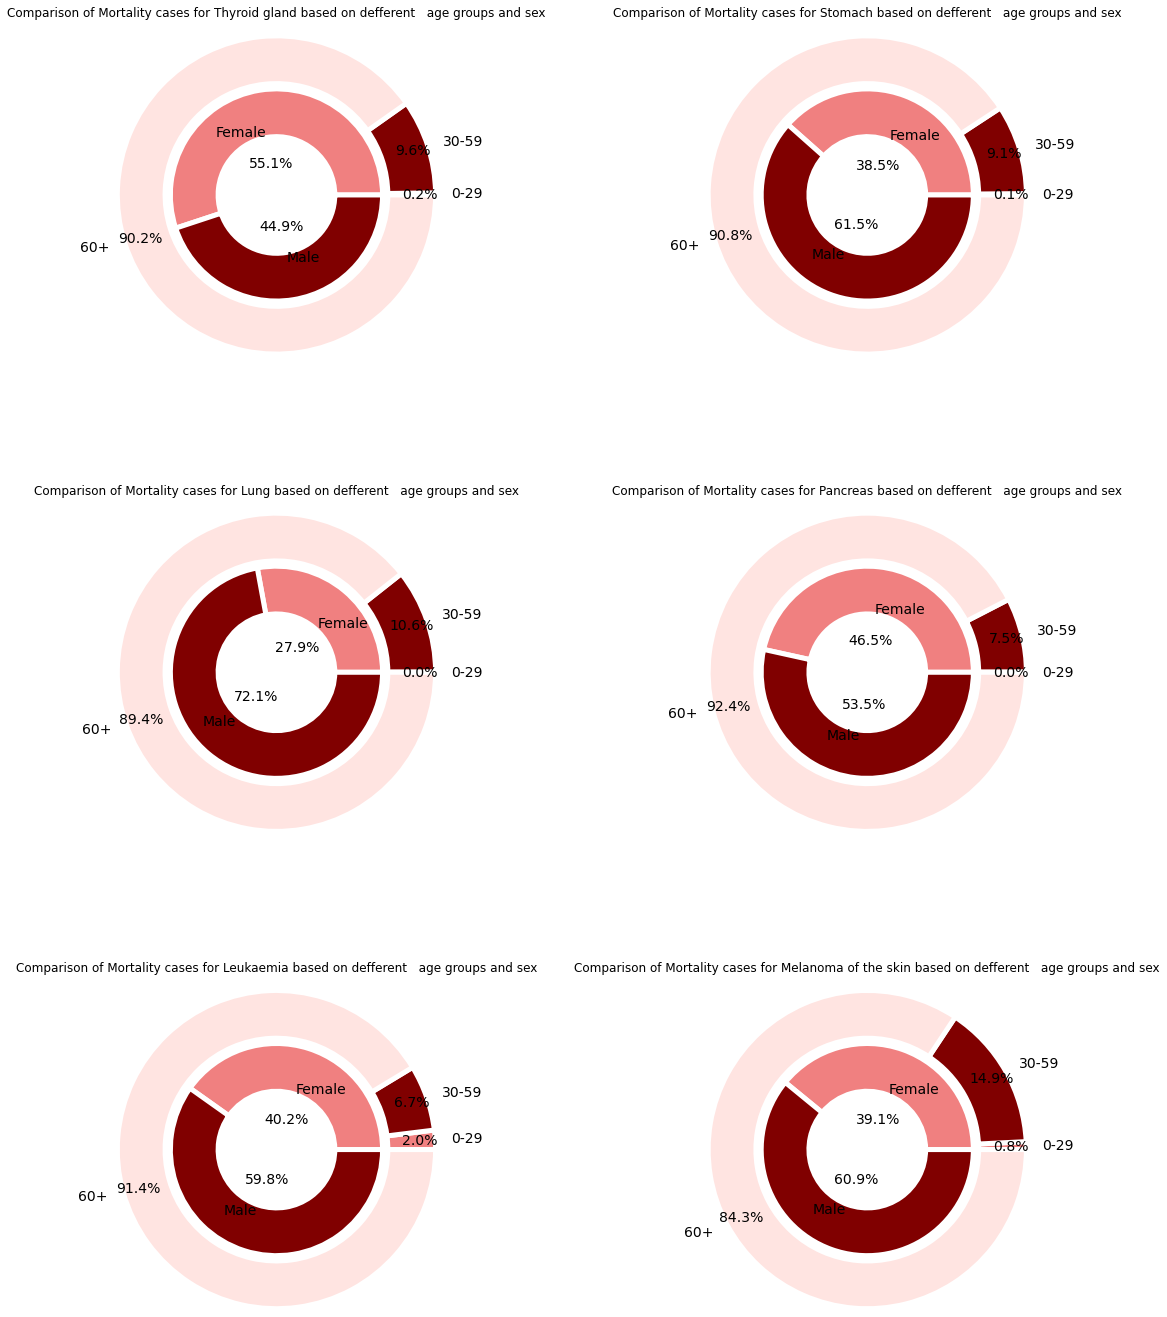

In [247]:
#choosing the comparable years for investigation:
MOR=selected_year_2.groupby("Indicator").get_group("Mortality");
#readjusting the plotting funtion for mortality:
def plotting2(x,y):
  ax=plt.gca()
  x[x["Cancer"]==y].groupby("Sex").Cases.mean()\
  .plot.pie(colors=colors,autopct='%1.1f%%', pctdistance=0.3, labeldistance=0.6,radius=2,\
            wedgeprops=dict(width=0.9, edgecolor='w',linewidth=5),textprops={'fontsize': 14});
  x[x["Cancer"]==y].groupby("Age").Cases.mean()\
  .plot.pie(colors=colors,autopct='%1.1f%%', pctdistance=0.9, labeldistance=1.1,radius=3,\
            wedgeprops=dict(width=0.9, edgecolor='w',linewidth=5),textprops={'fontsize': 14});
  plt.title("Comparison of Mortality cases for {} based on defferent \
  age groups and sex".format(y),y=1.8,fontdict={"size":12});
  plt.gca().axes.get_yaxis().set_visible(False);
  return(ax)
#defining a grid with subplots and using the plotting function:
fig=plt.figure(constrained_layout=True);
a= gridspec.GridSpec(ncols=3, nrows=7, figure=fig);
plt.figure(figsize=(15,20));
plt.subplot(a[0,0]);
plotting2(MOR,"Thyroid gland");
plt.subplot(a[0,2]);
plotting2(MOR,"Stomach");
plt.subplot(a[3,0]);
plotting2(MOR,"Lung");
plt.subplot(a[3,2]);
plotting2(MOR,"Pancreas");
plt.subplot(a[6,0]);
plotting2(MOR,"Leukaemia");
plt.subplot(a[6,2]);
plotting2(MOR,"Melanoma of the skin");

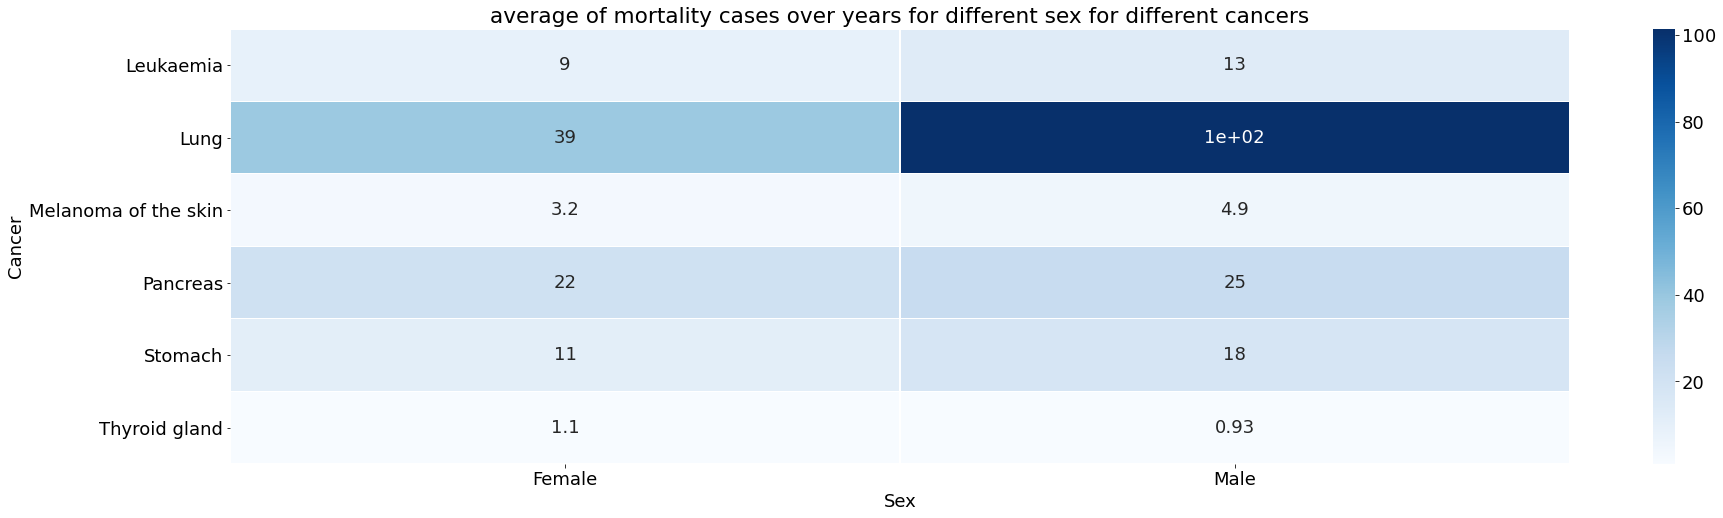

In [248]:
#a comparison illustrated in a heatmap for different cancers based on gender
SEX_M=MOR.groupby(["Cancer","Sex"]).Cases.mean().unstack()
plt.figure(figsize=(30,8));
sns.heatmap(SEX_M,annot=True,linewidths=0.2,linecolor="white",cmap="Blues");
plt.title("average of mortality cases over years for different sex for different cancers");

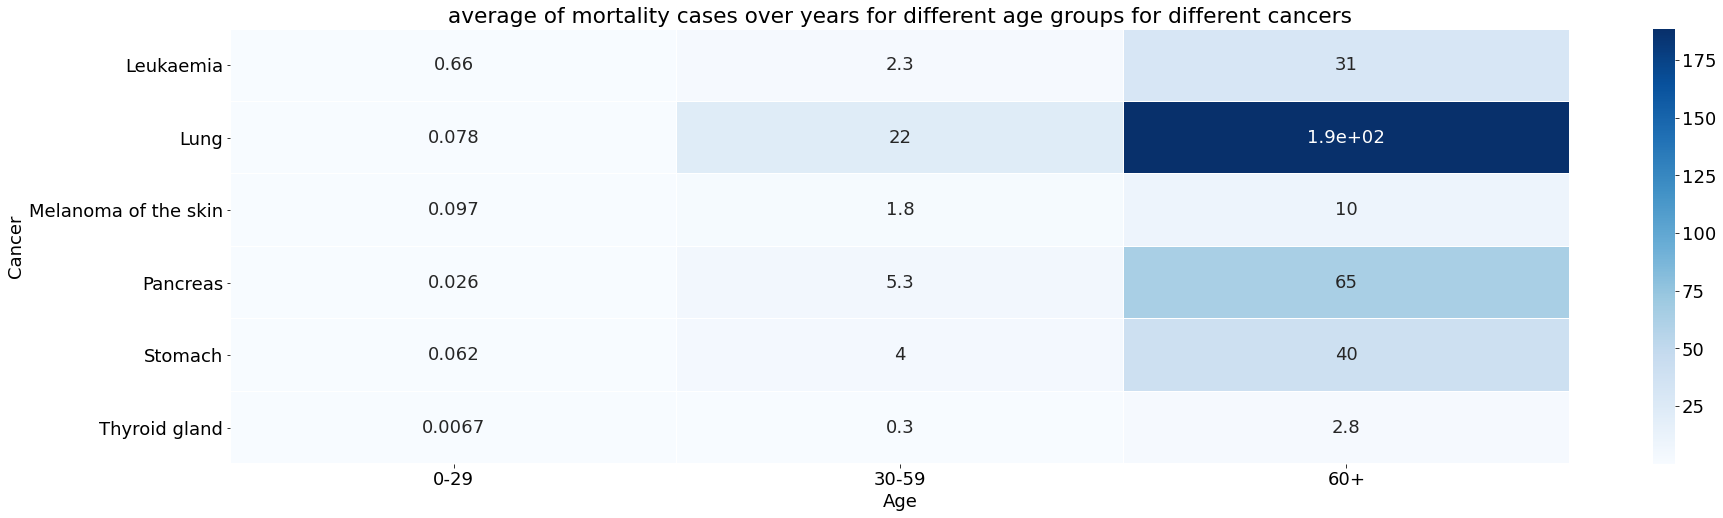

In [249]:
#a comparison illustrated in a heatmap for different cancers based on age
AGE_M=MOR.groupby(["Cancer","Age"]).Cases.mean().unstack()
plt.figure(figsize=(30,8));
sns.heatmap(AGE_M,annot=True,linewidths=0.2,linecolor="white",cmap="Blues");
plt.title("average of mortality cases over years for different age groups for different cancers");

# **Linear regression model**

I am looking at the trend of incidence cases over years for Hamburg and Saarland to creat a model.<br>
why Hamburg and Saarland? because they have more data points compared to the other states.

# **Incidence cases for Hamburg**

In [250]:
#selecting the data I wanna work on, in this case the number of incidences between 1995 to 2012 for Hamburg:
ham=df[df["Indicator"]=="Incidence"].groupby(["Registry"]).get_group("DE Hamburg").dropna()
#defining y-axis values
ham_y=ham.groupby("Year").Cases.mean()
#defining the x-axis values:
ham_x=df[(df["Year"]>1994) & (df["Year"]<2013)].Year.unique().reshape((-1, 1))
#to test the model, take 1/5 of data out. They are not chosen randomly each time!
x_train_Ha, x_test_Ha, y_train_Ha, y_test_Ha = train_test_split(ham_x, ham_y, test_size = 1/5,random_state=20)
#defining the model and fitting to data (train):
model_ha=LinearRegression()
model_ha=LinearRegression().fit(x_train_Ha,y_train_Ha)
#predict the values of hold-back set (x_test) and also x_train through the model:
y_ha_predict_test=model_ha.predict(x_test_Ha)
y_ha_predict_train=model_ha.predict(x_train_Ha)
#defining extra years for the cases I dont have in my dataset for the fitting line.
x_new_ham=[[1992],[1993],[1994],[2013],[2014],[2015],[2016],[2017],[2018],[2019],[2020],[2021]]
#computing the cases:
y_new_ham=model_ha.predict(x_new_ham)
#compute the root mean squared error of the fitting model.
print("RMSE of the train data of the linear regression model for Hamburg:{}"\
      .format(metrics.mean_squared_error(y_train_Ha, y_ha_predict_train,squared=False)))
print("RMSE of the test data of the linear regression model for Hamburg:{}"\
      .format(metrics.mean_squared_error(y_test_Ha, y_ha_predict_test,squared=False)))
#computing R-squared of data. If it is close to 1 that means the model and fitting was successful!
print("R^2 of the data for Hamburg data: {}".format(model_ha.score(ham_x,ham_y)))
R_Ham=model_ha.score(ham_x,ham_y)

RMSE of the train data of the linear regression model for Hamburg:1.1868703751791756
RMSE of the test data of the linear regression model for Hamburg:1.6117060632002116
R^2 of the data for Hamburg data: 0.3572511325042209


# **Incidence cases for Saarland**

In [251]:
#selecting the data I wanna work on, in this case the number of incidences between 1995 to 2012 for Saarland:
saar=df[df["Indicator"]=="Incidence"].groupby(["Registry"]).get_group("DE Saarland").dropna()
#defining the y-axis values
saar_y=saar.groupby("Year").Cases.mean()
#defining the x-axis values:
saar_x=df[(df["Year"]>1992) & (df["Year"]<2013)].Year.unique().reshape((-1, 1))
#to test the model, take 1/5 of data out. They are not chosen randomly each time!
x_train_Sa, x_test_Sa, y_train_Sa, y_test_Sa = train_test_split(saar_x, saar_y, test_size = 1/5,random_state=20)
#defining the model and fitting to data (train):
model_sa=LinearRegression()
model_sa=LinearRegression().fit(x_train_Sa,y_train_Sa)
#predict the values of hold-back set (x_test) and x_train through the model:
y_saar_predict_test=model_sa.predict(x_test_Sa)
y_saar_predict_train=model_sa.predict(x_train_Sa)
#defining extra years for the cases I dont have in my dataset for the fitting line.
x_new_saar=[[1991],[2014],[2015],[2016],[2017],[2018],[2019],[2020],[2021]]
#computing the cases:
y_new_saar=model_sa.predict(x_new_saar)
#compute the root of mean squared error of the fitting model:
print("RMSE of the train data of the linear regression model for Saarland: {}"\
      .format(metrics.mean_squared_error(y_train_Sa, y_saar_predict_train,squared=False)))
print("RMSE of the test data of the linear regression model for Saarland: {}"\
      .format(metrics.mean_squared_error(y_test_Sa, y_saar_predict_test,squared=False)))
print("R^2 of the data for Saarland data: {}".format(model_sa.score(saar_x,saar_y)))
R_saar=model_sa.score(saar_x,saar_y)

RMSE of the train data of the linear regression model for Saarland: 1.2015685513284733
RMSE of the test data of the linear regression model for Saarland: 1.3867021898032692
R^2 of the data for Saarland data: 0.5464296861219613


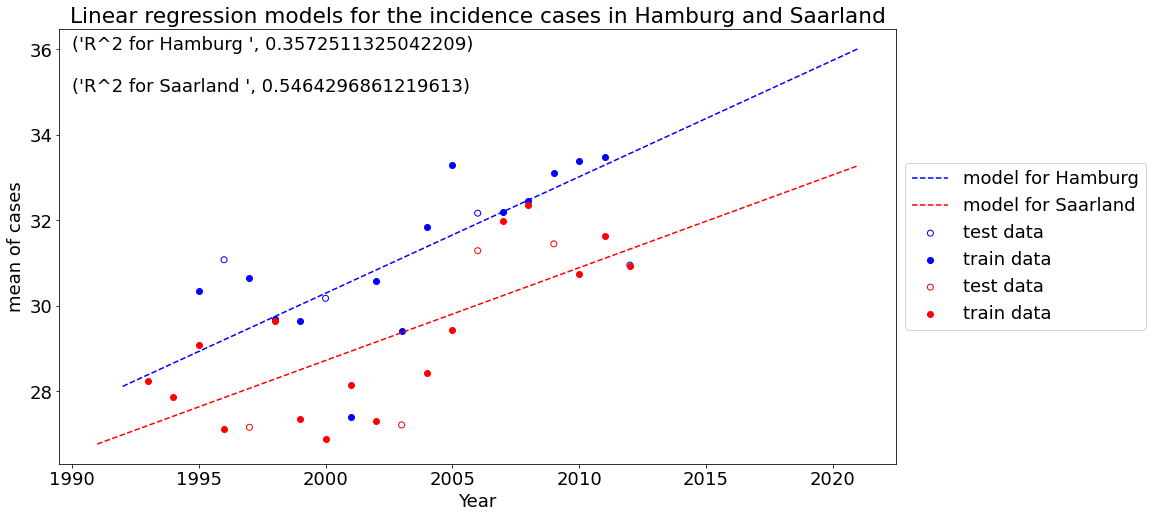

In [252]:
#plotting the fitting line and all the data:
#plotting the data of Hamburg:
plt.figure(figsize=(15,8));
#plotting the model
plt.plot(x_new_ham,y_new_ham,"--",color="blue",label="model for Hamburg");
#plotting the test data
plt.scatter(x_test_Ha,y_test_Ha,label="test data",facecolors='none', edgecolors='blue');
#plotting the train data
plt.scatter(x_train_Ha,y_train_Ha,color="blue",label="train data");

#plotting the data of Saarland:
#plotting the model
plt.plot(x_new_saar,y_new_saar,"--",color="red",label="model for Saarland");
#plotting the test data
plt.scatter(x_test_Sa,y_test_Sa,label="test data",facecolors='none', edgecolors='red');
#plotting the train data
plt.scatter(x_train_Sa,y_train_Sa,color="red",label="train data");

#adjusting the figure's labels an title and legend:
plt.ylabel("mean of cases");
plt.xlabel("Year");
plt.legend(loc="center left", bbox_to_anchor=(1, 0, 0.5, 1));
plt.title("Linear regression models for the incidence cases in Hamburg and Saarland",y=1);
#defining the position of the test inside the figure
plt.text(s=('R^2 for Hamburg ',R_Ham),x=1990,y=36);
plt.text(s=('R^2 for Saarland ',R_saar),x=1990,y=35);

# **Making a map!**
The number of Incidence Cases over 2008 to 2012 all over the Germany!

In [253]:
#loading the shapefile data (.shp) for the map through geopandaas!
Ger=gpd.read_file('/Users/farinaz/Desktop/Python/project/German_map/DEU_adm1.shp');
Ger.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,86,DEU,Germany,1,Baden-WÃ¼rttemberg,Land,State,None,None,"MULTIPOLYGON (((8.70837 47.71556, 8.70918 47.7..."
1,86,DEU,Germany,2,Bayern,Land,State,None,Bavaria,"POLYGON ((10.13386 50.55000, 10.13980 50.54252..."
2,86,DEU,Germany,3,Berlin,Land,State,None,None,"POLYGON ((13.17789 52.39032, 13.16575 52.39050..."
3,86,DEU,Germany,4,Brandenburg,Land,State,None,None,"POLYGON ((13.87951 53.50107, 13.87927 53.49908..."
4,86,DEU,Germany,5,Bremen,Land,State,None,None,"MULTIPOLYGON (((8.50506 53.23289, 8.51754 53.2..."


In [254]:
#defining the data that I wanna show on the map with a colorbar 
df1=df[(df["Year"]>2007)&(df["Year"]<2013)]
df1=df1[df1["Indicator"]=="Incidence"].groupby("Registry").Cases.mean()
df2=df1.reset_index()
df2

,Registry,Cases
0,DE Bavaria,28.335000
1,DE Berlin et al,29.417222
2,DE Bremen,33.348889
3,DE Hamburg,32.673889
4,DE Hessen,29.020556
5,DE Lower Saxony,31.082778
6,DE North Rhine-Westphalia,33.833889
7,DE Rhineland-Palatinate,28.718333
8,DE Saarland,31.421667
9,DE Schleswig-Holstein,31.555000


In [255]:
#filttering out the states for which I have info
Ger_1=Ger[["NAME_1","geometry"]].set_index("NAME_1")
Ger_2=Ger_1.drop(["Baden-WÃ¼rttemberg","Brandenburg","Mecklenburg-Vorpommern",
                  "Sachsen-Anhalt","Sachsen","ThÃ¼ringen"]).reset_index();
Ger_2

,NAME_1,geometry
0,Bayern,"POLYGON ((10.13386 50.55000, 10.13980 50.54252..."
1,Berlin,"POLYGON ((13.17789 52.39032, 13.16575 52.39050..."
2,Bremen,"MULTIPOLYGON (((8.50506 53.23289, 8.51754 53.2..."
3,Hamburg,"POLYGON ((10.07162 53.71823, 10.07150 53.72192..."
4,Hessen,"POLYGON ((9.49877 51.63152, 9.50474 51.62795, ..."
5,Niedersachsen,"MULTIPOLYGON (((6.86528 53.59597, 6.86528 53.5..."
6,Nordrhein-Westfalen,"POLYGON ((8.66628 52.52528, 8.67277 52.51795, ..."
7,Rheinland-Pfalz,"POLYGON ((7.79963 50.94302, 7.81179 50.93973, ..."
8,Saarland,"POLYGON ((7.03796 49.64338, 7.05590 49.63674, ..."
9,Schleswig-Holstein,"MULTIPOLYGON (((8.68972 54.06681, 8.68972 54.0..."


In [256]:
#adding the "Cases" column from my dataset to the map dataset.
Ger_2["Cases"]=df2["Cases"]
Ger_2

,NAME_1,geometry,Cases
0,Bayern,"POLYGON ((10.13386 50.55000, 10.13980 50.54252...",28.335000
1,Berlin,"POLYGON ((13.17789 52.39032, 13.16575 52.39050...",29.417222
2,Bremen,"MULTIPOLYGON (((8.50506 53.23289, 8.51754 53.2...",33.348889
3,Hamburg,"POLYGON ((10.07162 53.71823, 10.07150 53.72192...",32.673889
4,Hessen,"POLYGON ((9.49877 51.63152, 9.50474 51.62795, ...",29.020556
5,Niedersachsen,"MULTIPOLYGON (((6.86528 53.59597, 6.86528 53.5...",31.082778
6,Nordrhein-Westfalen,"POLYGON ((8.66628 52.52528, 8.67277 52.51795, ...",33.833889
7,Rheinland-Pfalz,"POLYGON ((7.79963 50.94302, 7.81179 50.93973, ...",28.718333
8,Saarland,"POLYGON ((7.03796 49.64338, 7.05590 49.63674, ...",31.421667
9,Schleswig-Holstein,"MULTIPOLYGON (((8.68972 54.06681, 8.68972 54.0...",31.555000


In [257]:
#defining a column with the title "Cases" for the states with no info and filling them with NaN.
#getting the columns from Ger_1 dataframe
Ger_3=Ger_1.loc[["Baden-WÃ¼rttemberg","Brandenburg","Mecklenburg-Vorpommern",
                 "Sachsen-Anhalt","Sachsen","ThÃ¼ringen"]].reset_index()
#making an empty column with the title "Cases"
Ger_3["Cases"]=""
#filling it with NaN
Ger_3=Ger_3.replace({"":np.nan})
Ger_3

,NAME_1,geometry,Cases
0,Baden-WÃ¼rttemberg,"MULTIPOLYGON (((8.70837 47.71556, 8.70918 47.7...",NaN
1,Brandenburg,"POLYGON ((13.87951 53.50107, 13.87927 53.49908...",NaN
2,Mecklenburg-Vorpommern,"MULTIPOLYGON (((14.26472 53.71069, 14.26472 53...",NaN
3,Sachsen-Anhalt,"POLYGON ((11.63251 53.01641, 11.63239 53.00897...",NaN
4,Sachsen,"POLYGON ((12.87800 51.67270, 12.87185 51.66910...",NaN
5,ThÃ¼ringen,"POLYGON ((10.77189 51.64491, 10.78391 51.64098...",NaN


In [258]:
#merging the df of states with info and states without info
Ger_fin=gpd.GeoDataFrame(pd.concat([Ger_2,Ger_3], ignore_index=True))
Ger_fin
#due to some reason the german alphabet can't be read properly, so I rename the wrong state names!
Ger_fin=Ger_fin.set_index("NAME_1").rename({"Baden-WÃ¼rttemberg":"Baden-Württemberg",
                                            "ThÃ¼ringen":"Thüringen"}).reset_index()
Ger_fin

,NAME_1,geometry,Cases
0,Bayern,"POLYGON ((10.13386 50.55000, 10.13980 50.54252...",28.335000
1,Berlin,"POLYGON ((13.17789 52.39032, 13.16575 52.39050...",29.417222
2,Bremen,"MULTIPOLYGON (((8.50506 53.23289, 8.51754 53.2...",33.348889
3,Hamburg,"POLYGON ((10.07162 53.71823, 10.07150 53.72192...",32.673889
4,Hessen,"POLYGON ((9.49877 51.63152, 9.50474 51.62795, ...",29.020556
5,Niedersachsen,"MULTIPOLYGON (((6.86528 53.59597, 6.86528 53.5...",31.082778
6,Nordrhein-Westfalen,"POLYGON ((8.66628 52.52528, 8.67277 52.51795, ...",33.833889
7,Rheinland-Pfalz,"POLYGON ((7.79963 50.94302, 7.81179 50.93973, ...",28.718333
8,Saarland,"POLYGON ((7.03796 49.64338, 7.05590 49.63674, ...",31.421667
9,Schleswig-Holstein,"MULTIPOLYGON (((8.68972 54.06681, 8.68972 54.0...",31.555000


In [259]:
#defining a new column for coordination which helps me later for labeling the states
#From the Shapely docs:representative_point() Returns a computed point that is guaranteed
#to be within the geometric object.
Ger_fin['coords'] = Ger_fin['geometry'].apply(lambda x: x.representative_point().coords[:])
#taking the coords out of the list
Ger_fin['coords'] = [coords[0] for coords in Ger_fin['coords']]

In [260]:
Ger_fin.set_index("NAME_1")

,geometry,Cases,coords
NAME_1,,,
Bayern,"POLYGON ((10.13386 50.55000, 10.13980 50.54252...",28.335000,"(12.054396311305329, 48.91878128051761)"
Berlin,"POLYGON ((13.17789 52.39032, 13.16575 52.39050...",29.417222,"(13.405043170349634, 52.50713539123538)"
Bremen,"MULTIPOLYGON (((8.50506 53.23289, 8.51754 53.2...",33.348889,"(8.805347796775639, 53.12397575378421)"
Hamburg,"POLYGON ((10.07162 53.71823, 10.07150 53.72192...",32.673889,"(9.941413732503936, 53.57551956176766)"
Hessen,"POLYGON ((9.49877 51.63152, 9.50474 51.62795, ...",29.020556,"(9.034114119004384, 50.53219032287603)"
Niedersachsen,"MULTIPOLYGON (((6.86528 53.59597, 6.86528 53.5...",31.082778,"(8.843876047315568, 52.59736061096197)"
Nordrhein-Westfalen,"POLYGON ((8.66628 52.52528, 8.67277 52.51795, ...",33.833889,"(7.593622037948451, 51.42450523376468)"
Rheinland-Pfalz,"POLYGON ((7.79963 50.94302, 7.81179 50.93973, ...",28.718333,"(7.274907088463036, 49.95533943176278)"
Saarland,"POLYGON ((7.03796 49.64338, 7.05590 49.63674, ...",31.421667,"(6.979897848815577, 49.3792095184327)"


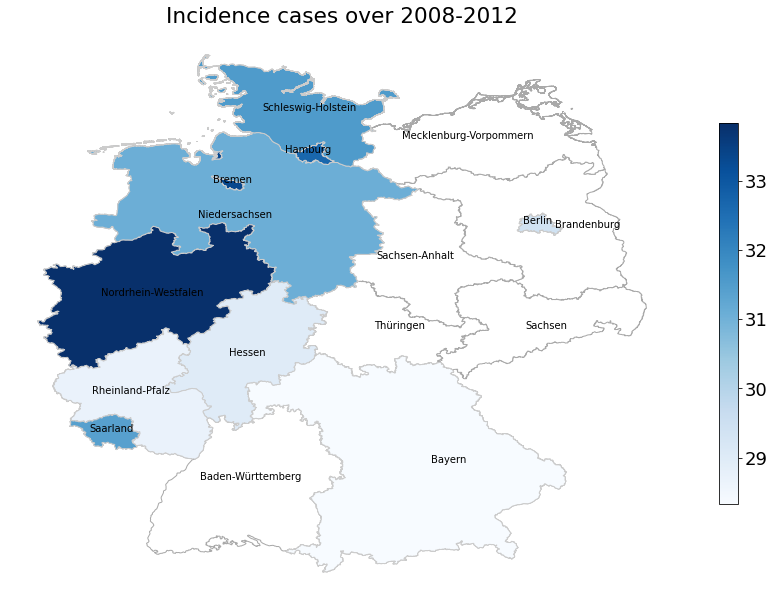

In [261]:
#defining the max and min values I wanna show, they are gonna be the range for the colorbar
MIN=Ger_2["Cases"].min()
MAX=Ger_2["Cases"].max()
#plotting the map
fig, ax=plt.subplots(1,figsize=(15,20));
#first plot the map without any data from my dataset
Ger_fin.plot(color='white', ax=ax, linewidth=1, edgecolor='darkgrey')
ax.axis('off');
#getting rid of NaN data, plotting the values for each states
Ger_fin.dropna().plot(column="Cases", cmap='Blues', ax=ax, linewidth=1, edgecolor='0.8');
#defining the title
ax.set_title("Incidence cases over 2008-2012");
#creating the color bar, where the min and max of my scale are set to the MAX and MIN that I calculated before
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=MIN, vmax=MAX));
cbar = fig.colorbar(sm,shrink=0.35)
#annotating the map by using a for loop
#.iterrows():Iterate over rows as pairs.
for idx, row in Ger_fin.iterrows():
    #annotate: important parameters:s= the text as str, xy= the position of annot.
    plt.annotate(s=row['NAME_1'], xy=row['coords'],horizontalalignment='center',fontsize=10)

The data of state borders for Germany were taken from the [GADM data source.](https://gadm.org/download_country_v3.html)

# conclusion

what I learned: 
* Bremen shows the biggest number of incidence cases over the years while Bavaria has the smallest number of cases! 
* Saarland has the biggest number of mortality cases over the years while Bavaria has the smalllest number of cases! 
* Lung cancer is the most common cancer while Thyroid gland cancer shows the smallest number of incidence. Skin cancer shows the smallest correlation between Incidence and Mortality which means the possibility of death from this cancer is small, on the contrary Pancreas shows the highest possibility!
* The incidence and mortality depend on the sex and age! For male and poeple older than 60 the possibility of having the cancer and death is bigger!

challanges: 
* The linear regression model was not succefull which can be due to the small number of cases, I need data for more years to have a better fit! 
* Finding a reasonable and scientific comparison between my variables which weren't affected significantly by the missing data.